In [2]:
import numpy as np
import gc
import fnmatch
gc.collect()
import os
import yaml
import matplotlib.pyplot as plt
from collections import deque 
import time

import MDAnalysis as mda

In [257]:
class Micelle():
    def __init__(self, name, sds, save_freq=10):
        self.name = name
        self.sds = sds
        self.save_freq=save_freq
        self.mindis = {}
        
        self.analysis = {}
        self.cutoffs={}
        self.readInput()
    
    def readInput(self):
        for i in range(1,self.sds+1):
            self.mindis[i]=[]
        
        start = time.time()
        with open(self.name,"r") as f:
            for line in f:
                if "#" in line:
                    pass
                elif "@" in line:
                    pass
                else:
                    for i in range(1,self.sds+1):
                        self.mindis[i].append(float(line.split()[i]))
        end = time.time()
        print("Input file read in ",end - start," s")
        
    def plotAveraged(self, average,line):

        
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        for i in range(1,self.sds+1):




            plt.plot(x,self.analysis[average][i])
            plt.axhline(y = line, color = 'black', linestyle = '-')

        plt.xlabel("Simulation time [ns]")
        plt.ylabel("Min-dist from protein [nm]")
        plt.show()
        
        self.cutoffs[average]=line



    def runAnalysis(self, average):
        
        in_micelle_avr={}
        in_micelle_avr_apu={}
        for i in range(1,self.sds+1):
            in_micelle_avr[i]=[]
            in_micelle_avr_apu[i]=[]

        i=0
        start = time.time()
        #print(len(self.mindis[1]))
        while i< len(self.mindis[1])-average:
            for k in range(1,self.sds+1):
                for j in range(0,average):
                    in_micelle_avr_apu[k].append(self.mindis[k][i+j])
                in_micelle_avr[k].append(np.average(in_micelle_avr_apu[k]))
                
                in_micelle_avr_apu[k]=[]
            i+=average

        end = time.time()
        print("Analysis took ",end - start," s")
        
        self.analysis[average]=in_micelle_avr

        
        

    def plotInMicelle(self,average):
        micelle_size=[]
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
      
        for i in range(len(self.analysis[average][1])):
            number=0
            for j in range(1,self.sds+1):
                if self.analysis[average][j][i]<self.cutoffs[average]:
                    number+=1
            micelle_size.append(number)

        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})



        plt.plot(x,micelle_size)


        plt.show()
        
    def plotAll(self):
        
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        
        for average in self.analysis:
            micelle_size=[]
            x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]

            for i in range(len(self.analysis[average][1])):
                number=0
                for j in range(1,self.sds+1):
                    if self.analysis[average][j][i]<self.cutoffs[average]:
                        number+=1
                micelle_size.append(number)

            


            plt.plot(x,micelle_size,label=average)
        plt.legend(loc="upper left")
        plt.show()
            

In [9]:
sds60=Micelle("60sds_gwalp.xvg",60)

Input file read in  54.15109896659851  s


In [76]:
sds60_2=Micelle("mindist_13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",60,100)

Input file read in  5.314704418182373  s


In [104]:
sds50=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50)

Input file read in  44.1489691734314  s


In [4]:
sds70=Micelle("mindist_142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",70)

Input file read in  67.67925214767456  s


In [94]:
sds40=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",40,100)
#sds45=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50,100)
sds50=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50,100)
sds60=Micelle("mindist_13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",60,100)
sds70=Micelle("mindist_142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",70,100)

sds40.runAnalysis(50)
sds50.runAnalysis(50)
sds60.runAnalysis(50)
sds70.runAnalysis(50)

Input file read in  3.3131508827209473  s
Input file read in  4.0917768478393555  s
Input file read in  5.122741222381592  s
Input file read in  6.759304523468018  s


In [304]:
hMff40_2=Micelle("mindist_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",40,100)
hMff40_3=Micelle("mindist_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",40,100)
hMff45_2=Micelle("mindist_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",45,100)
hMff45_3=Micelle("mindist_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",45,100)
hMff50_2=Micelle("mindist_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",50,100)
hMff50_3=Micelle("mindist_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",50,100)
hMff60_2=Micelle("mindist_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",60,100)
hMff60_3=Micelle("mindist_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",60,100)




Input file read in  1.913182020187378  s
Input file read in  1.9187958240509033  s
Input file read in  2.4155077934265137  s
Input file read in  2.375769853591919  s
Input file read in  2.9069018363952637  s
Input file read in  2.862703323364258  s
Input file read in  4.058150291442871  s
Input file read in  4.0277183055877686  s


In [305]:
hMff40_2.runAnalysis(50)
hMff40_3.runAnalysis(50)

hMff45_2.runAnalysis(50)
hMff45_3.runAnalysis(50)

hMff50_2.runAnalysis(50)
hMff50_3.runAnalysis(50)

hMff60_2.runAnalysis(80)
hMff60_3.runAnalysis(50)


Analysis took  0.3705286979675293  s
Analysis took  0.35626816749572754  s
Analysis took  0.4051203727722168  s
Analysis took  0.40309858322143555  s
Analysis took  0.44177722930908203  s
Analysis took  0.45117759704589844  s
Analysis took  0.45609283447265625  s
Analysis took  0.5300707817077637  s


In [325]:
hMff50_3.runAnalysis(80)
hMff60_3.runAnalysis(80)

Analysis took  0.39719462394714355  s
Analysis took  0.4586653709411621  s


In [198]:
sds40=Micelle("mindist_12_Gwalp_dimer_40SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",40,100)
sds40.runAnalysis(50)

Input file read in  2.690030336380005  s
44726
Analysis took  0.5342023372650146  s


In [200]:
sds45=Micelle("mindist_11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",45,100)
sds45.runAnalysis(50)

Input file read in  4.140213966369629  s
51847
Analysis took  0.7609226703643799  s


In [174]:
len(sds40.analysis[50][1])

858

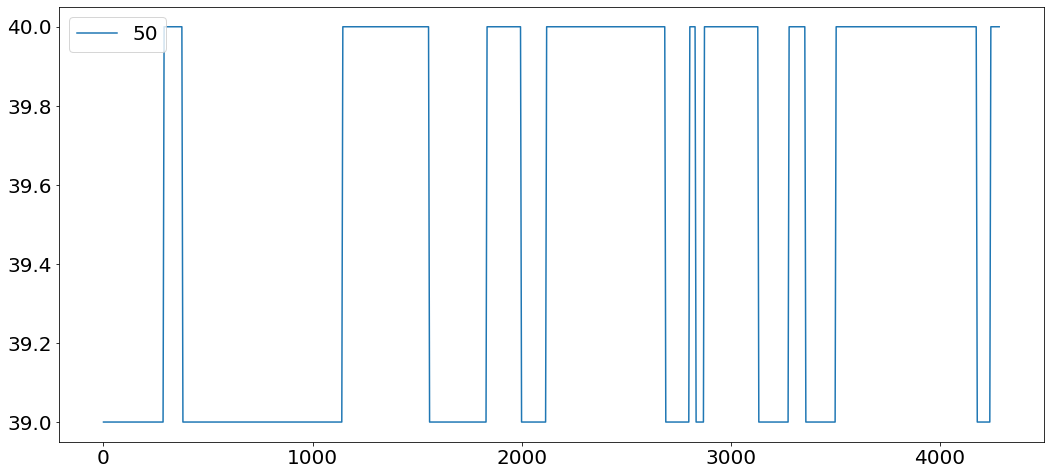

In [131]:
sds40.plotAll()

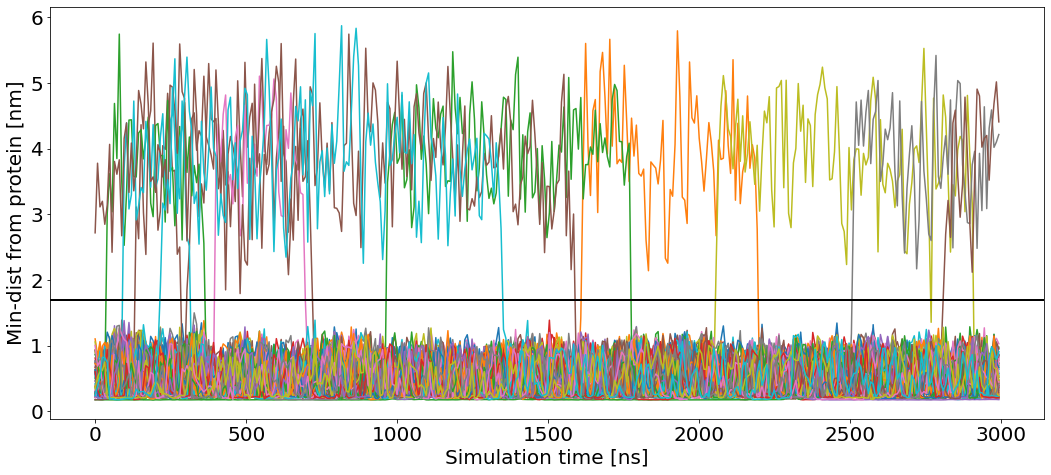

In [326]:
hMff50_3.plotAveraged(80,1.7)

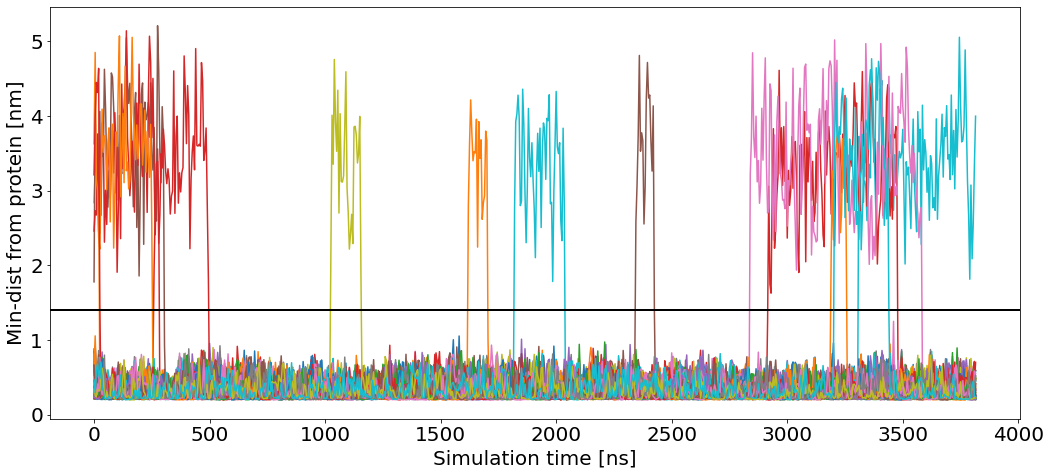

In [11]:
sds60_2.plotAveraged(50,1.4)

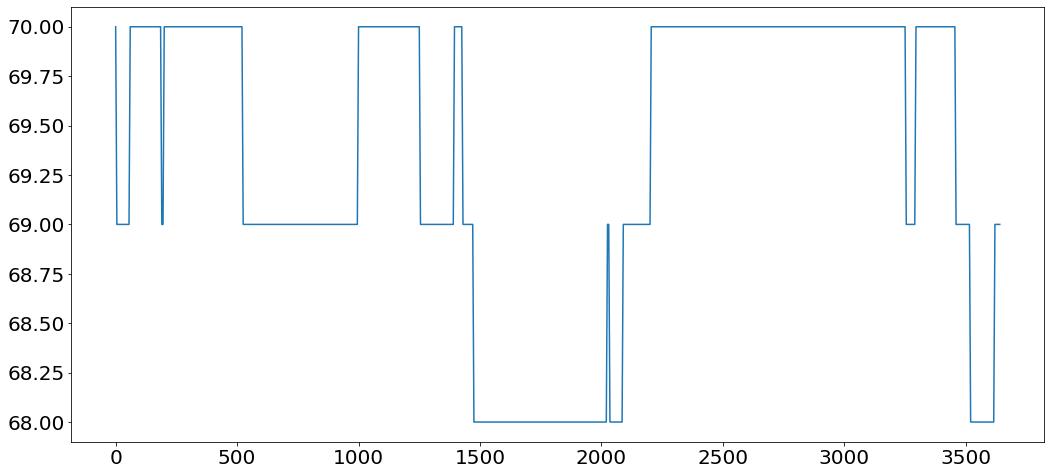

In [130]:
sds70.plotInMicelle(500)

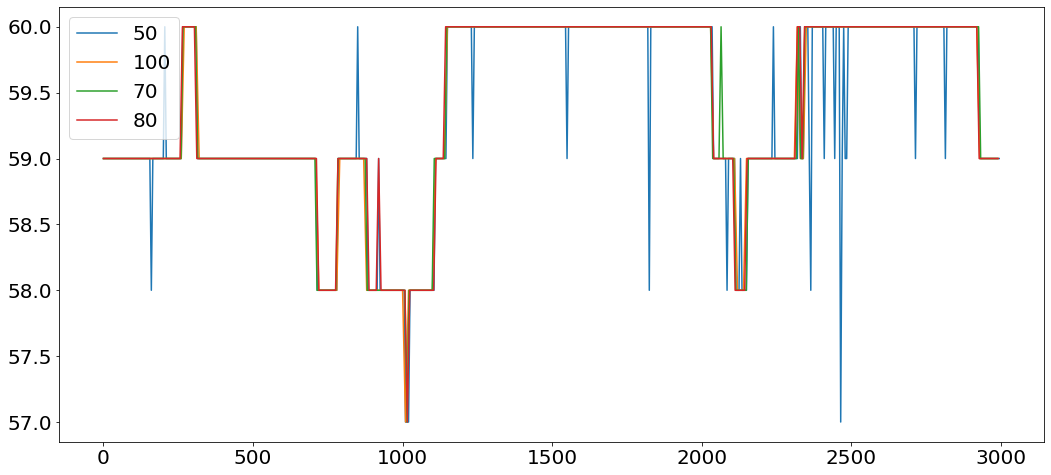

In [296]:
#sds70.plotAll()
hMff60_2.plotAll()

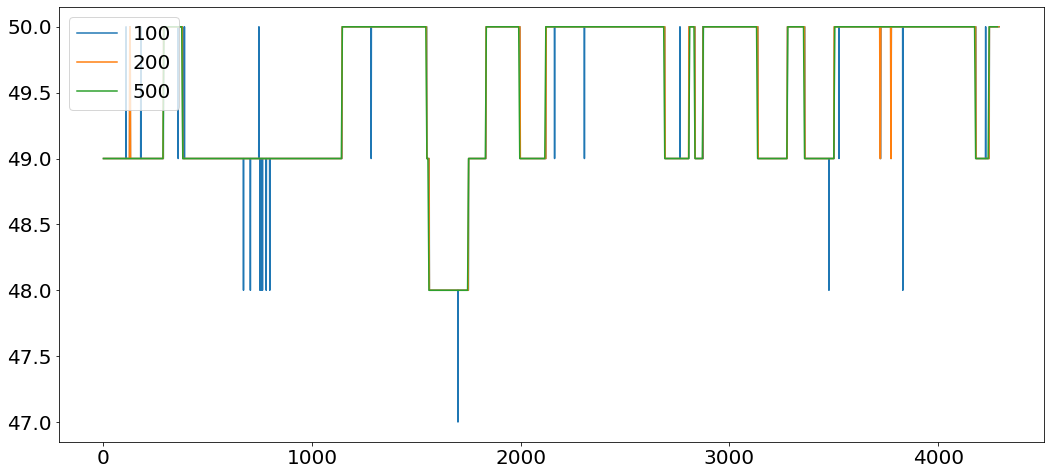

In [126]:
sds50.plotAll()

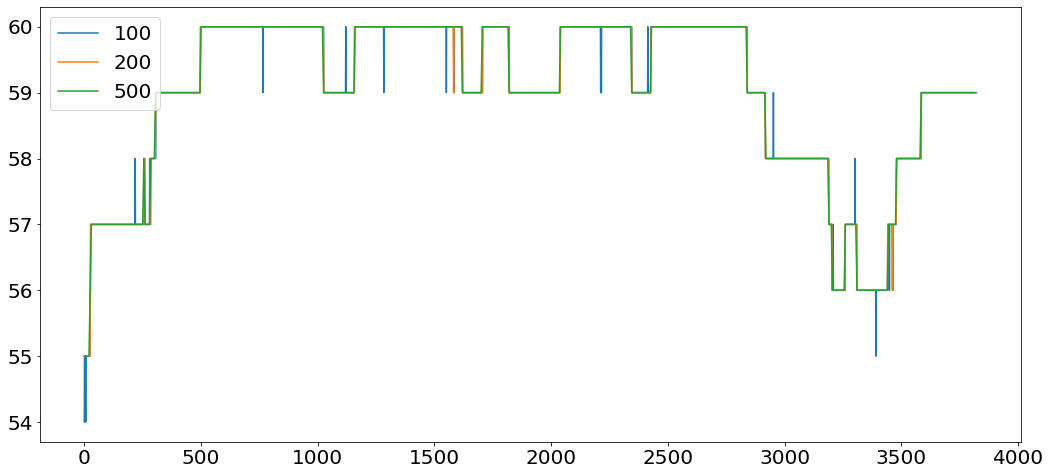

In [103]:
sds60.plotAll()

In [13]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)/10

In [264]:
def skip_traj(file,folder_path):
    path=folder_path+file+"/"
    
    readme=path+"README.yaml"
    with open(readme) as yaml_file:
        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
        
    print("Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...")
    start = time.time()
    os.system("echo 'System'|gmx trjconv -f whole_"+ file+"_center_pbc_atom.xtc -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"_center_pbc_atom_skip.xtc  -pbc mol -skip 10 >/dev/null 2>&1")
    end = time.time()
    print("Trjconv took ",end - start," s")
    
def get_gyration(file,folder_path,micelle,average):
    skip_traj(file,folder_path)

    start = time.time()
    u = mda.Universe(file+".gro", file+"_center_pbc_atom_skip.xtc")
    end = time.time()
    print("Load of trajectory takes ",end - start," s")
    print("traj frames",len(u.trajectory))
    print("corresponding file", len(micelle.analysis[average][1]))
    
    print("their ratio",len(u.trajectory)/len(micelle.analysis[average][1]))
    sds=u.select_atoms('resname SDS ')


    start = time.time()
    radius=[]
    
    divide=len(u.trajectory)/len(micelle.analysis[average][1])*1000
    test_times=[]
    lipid_gone=[]
    for frame in u.trajectory:
        test_times.append(u.trajectory.ts.time)
        select="protein or "
        lipi=0
        for i,resid in enumerate(set(sds.resids)):
            if micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)]<micelle.cutoffs[average]:
                select+="resid "+str(resid)+" or "
                lipi+=1
                
            #else:
            #    print("resid ",resid, ", time ",u.trajectory.ts.time,int(u.trajectory.ts.time//divide)*int(average/1000*micelle.save_freq),micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)])
        
        lipid_gone.append(lipi)
                
        select=select[:-4]
        sdsIn=u.select_atoms(select)

        radius.append(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses))[0])
        
        
        #print(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses)))
        #print(u.trajectory.ts.time//5000)

    end = time.time()
    print("Calculation of radius of gyration takes ",end - start," s")
    print("Average radius is ",np.average(radius),"\n ")
    
    
    plt.rcParams["figure.figsize"] = [15.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams.update({'font.size': 20})


    plt.plot(test_times,lipid_gone)
    
    
    micelle_size=[]
      
    for i in range(len(micelle.analysis[average][1])):
        number=0
        for j in range(1,micelle.sds+1):
            if micelle.analysis[average][j][i]<micelle.cutoffs[average]:
                number+=1
        micelle_size.append(number)
    
    x40=[*range(0,len(micelle.analysis[average][1])*int(divide),int(divide))]
    plt.plot(x40,micelle_size)

    plt.show()
    
    
    return radius

In [172]:
50/1000*100

5.0

Gromacs trjconv running in the background ...
Trjconv took  8.15330171585083  s
Load of trajectory takes  0.02771925926208496  s
traj frames 5185
corresponding file 1036
their ratio 5.004826254826255
Calculation of radius of gyration takes  30.205850839614868  s
Average radius is  1.5456231093392014 
 


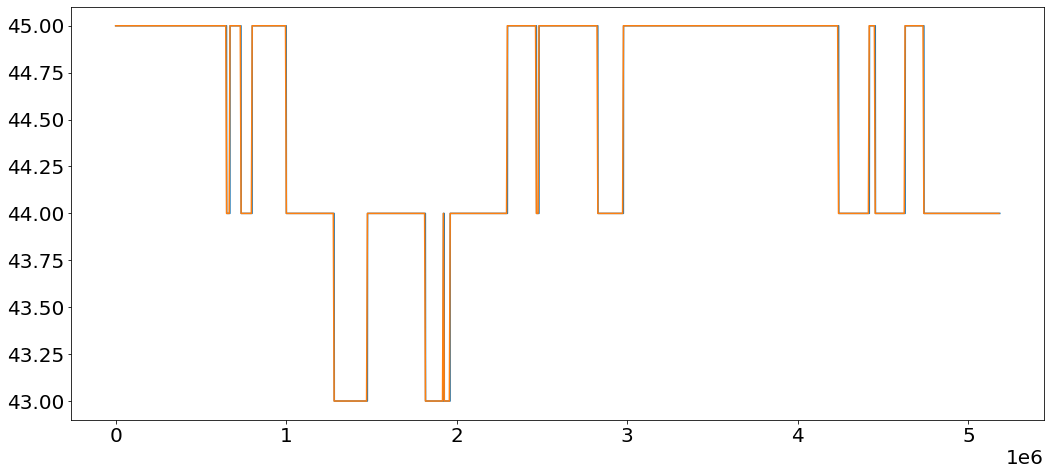

In [204]:
file="13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/mahti/GWALP_dimers/"
#file="12_Gwalp_dimer_40SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
#radius40=get_gyration(file,folder_path,sds40,50)

#file="1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
#radius50=get_gyration(file,folder_path,sds50,50)

#file="13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
#radius60=get_gyration(file,folder_path,sds60,50)

#file="142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
#radius70=get_gyration(file,folder_path,sds70,50)


file="11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius45=get_gyration(file,folder_path,sds45,50)

   

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  4.304575681686401  s
Load of trajectory takes  0.023003578186035156  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  16.30125331878662  s
Average radius is  1.5246983682966917 
 


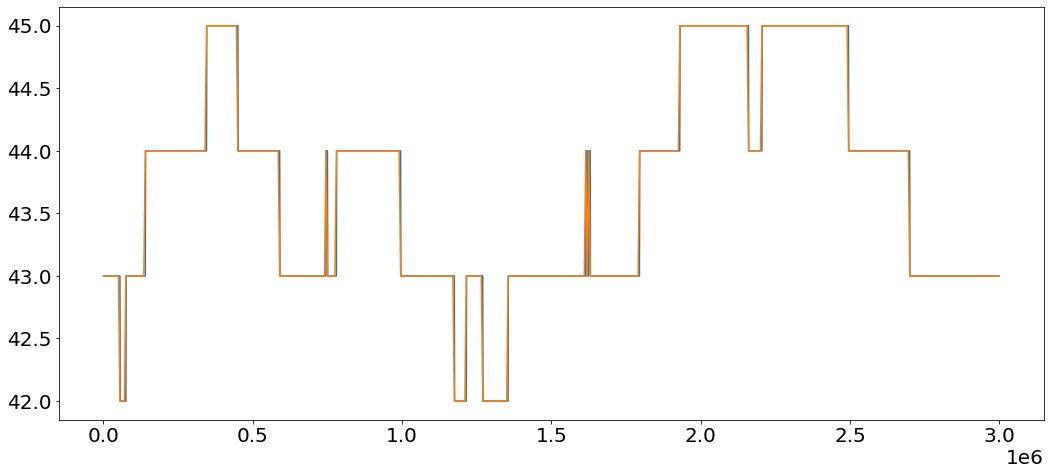

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  4.407793045043945  s
Load of trajectory takes  0.03549671173095703  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  16.62594509124756  s
Average radius is  1.528848718836261 
 


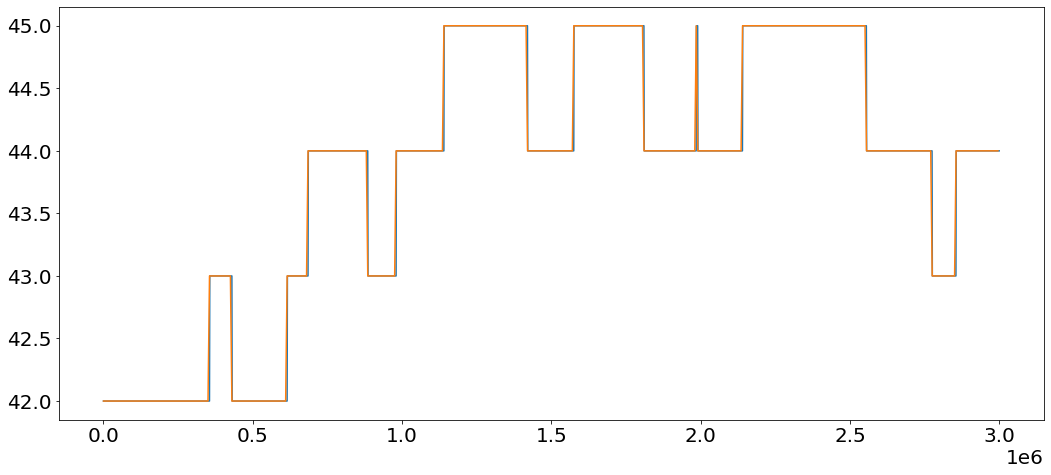

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  4.736406326293945  s
Load of trajectory takes  0.03081679344177246  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  18.29818058013916  s
Average radius is  1.5743948423556138 
 


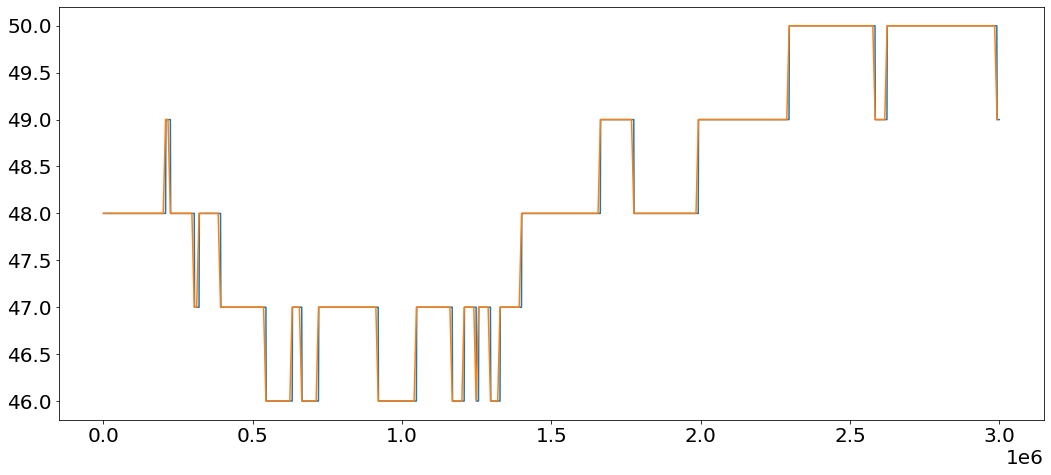

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  4.807466506958008  s
Load of trajectory takes  0.03309369087219238  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  18.540658950805664  s
Average radius is  1.5772961981501867 
 


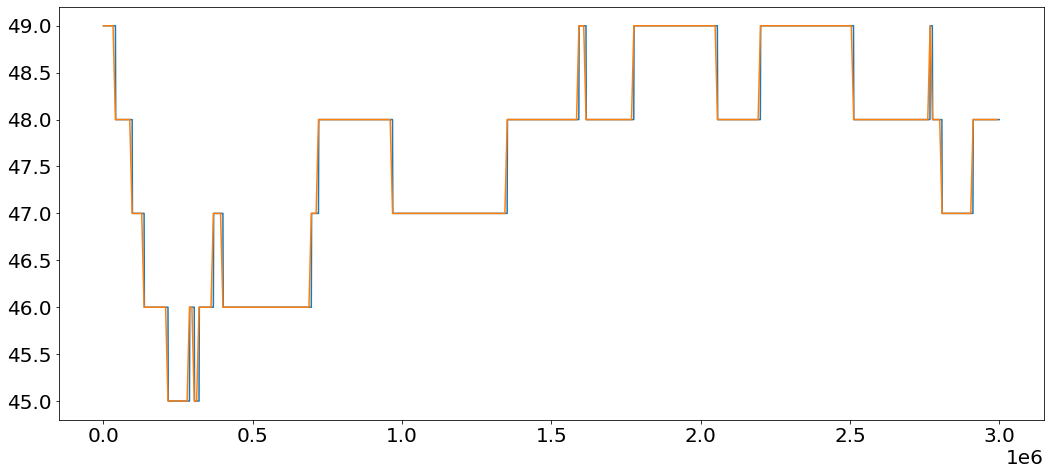

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  5.3822174072265625  s
Load of trajectory takes  0.02505326271057129  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  23.539379119873047  s
Average radius is  1.7165306743963464 
 


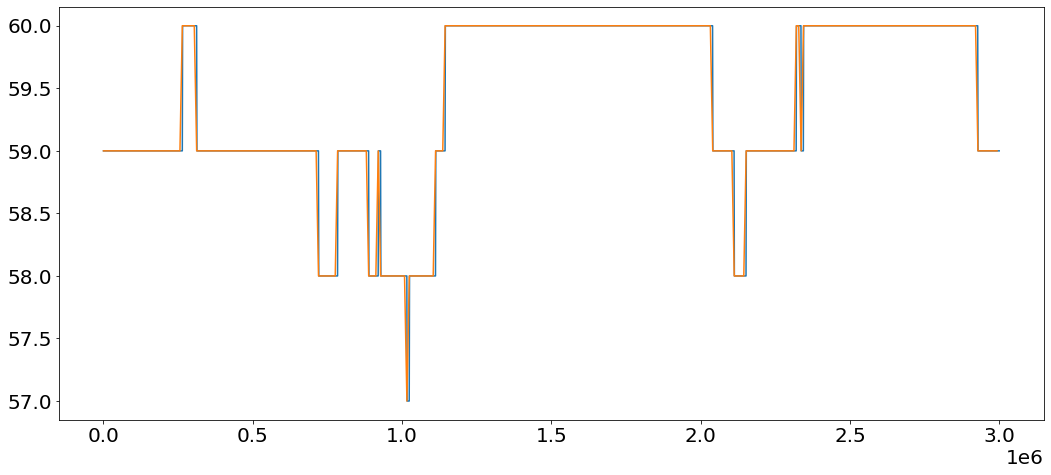

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  5.451758146286011  s
Load of trajectory takes  0.027521371841430664  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  22.7208890914917  s
Average radius is  1.6919528162090784 
 


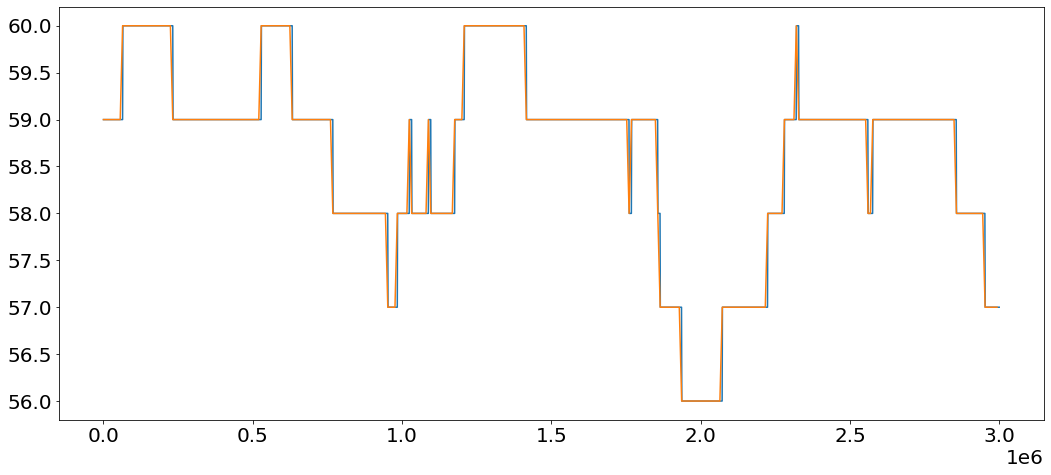

In [327]:
folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/new_replicas/"
#file="hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2"
#radius_hMff_40_2=get_gyration(file,folder_path,hMff40_2,50)

#file="hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3"
#radius_hMff_40_3=get_gyration(file,folder_path,hMff40_3,50)


file="hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_45_2=get_gyration(file,folder_path,hMff45_2,50)

file="hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_45_3=get_gyration(file,folder_path,hMff45_3,50)

file="hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_50_2=get_gyration(file,folder_path,hMff50_2,80)

file="hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_50_3=get_gyration(file,folder_path,hMff50_3,80)

file="hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_60_2=get_gyration(file,folder_path,hMff60_2,80)

file="hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_60_3=get_gyration(file,folder_path,hMff60_3,80)


In [121]:
4473/len(sds40.analysis[50][1])

5.213286713286713

In [162]:
radius40

[1.7753974233584295,
 1.6576004294169717,
 1.750120608776895,
 1.6873629180203367,
 1.6264498122305604,
 1.627651597250497,
 1.5871375091439273,
 1.5768278165199576,
 1.589958047099602,
 1.5962522721834118,
 1.6147113884834858,
 1.67646745540343,
 1.6445984684297517,
 1.6314198156910273,
 1.6033017994876164,
 1.5955287681803867,
 1.615376317687319,
 1.6107719197519366,
 1.64723474314811,
 1.6379528071770384,
 1.573232544246805,
 1.6199245540675207,
 1.6280983587029798,
 1.6446773913610524,
 1.6708600456288611,
 1.5823533540889296,
 1.6768811510360415,
 1.6316212632958174,
 1.6233224280240492,
 1.649327782109594,
 1.5673680361314306,
 1.574393097254576,
 1.5539845745019762,
 1.5181584846603084,
 1.543750787306704,
 1.5806014745845243,
 1.6564017694571969,
 1.5115285805752294,
 1.4915242186427788,
 1.4913022284371036,
 1.517590233741192,
 1.5204296766561363,
 1.49793360072415,
 1.511993622807146,
 1.5278793854676627,
 1.5070932668131818,
 1.5082584921757207,
 1.5061182059394225,
 1.51037

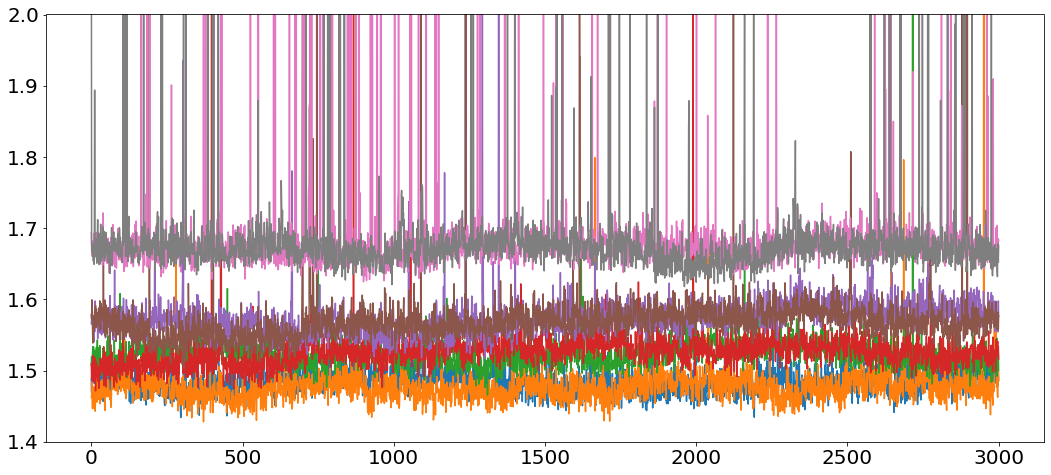

In [334]:
x40=[*range(0,len(radius_hMff_40_2),1)]
x45=[*range(0,len(radius_hMff_45_2),1)]
x50=[*range(0,len(radius_hMff_50_2),1)]
x60=[*range(0,len(radius_hMff_60_2),1)]
x603=[*range(0,len(radius_hMff_60_3),1)]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
        
plt.ylim(1.4,2)

plt.plot(x40,radius_hMff_40_2)
plt.plot(x40,radius_hMff_40_3)



plt.plot(x45,radius_hMff_45_2)
plt.plot(x45,radius_hMff_45_3)


plt.plot(x50,radius_hMff_50_2)
plt.plot(x50,radius_hMff_50_3)


plt.plot(x60,radius_hMff_60_2)
plt.plot(x603,radius_hMff_60_3)

        
plt.show()

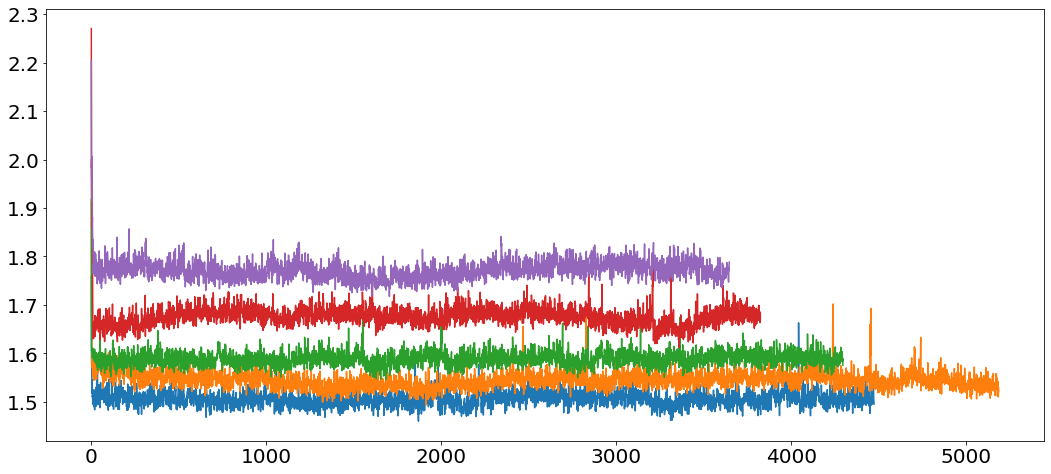

In [243]:
x40=[*range(0,len(radius40),1)]
x45=[*range(0,len(radius45),1)]
x50=[*range(0,len(radius50),1)]
x60=[*range(0,len(radius60),1)]
x70=[*range(0,len(radius70),1)]

plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
        
        

plt.plot(x40,radius40)
plt.plot(x45,radius45)
plt.plot(x50,radius50)
plt.plot(x60,radius60)
plt.plot(x70,radius70)



        
plt.show()

In [270]:
np.average(radius40)

1.5065701983507784

In [388]:
1/(1.380649 * 10**(-23)*310/(8*np.pi*0.0006913*(np.average(radius_hMff_40_3)*10**(-9))**3))

1.3101388161685034e-08

In [273]:
np.pi

3.141592653589793

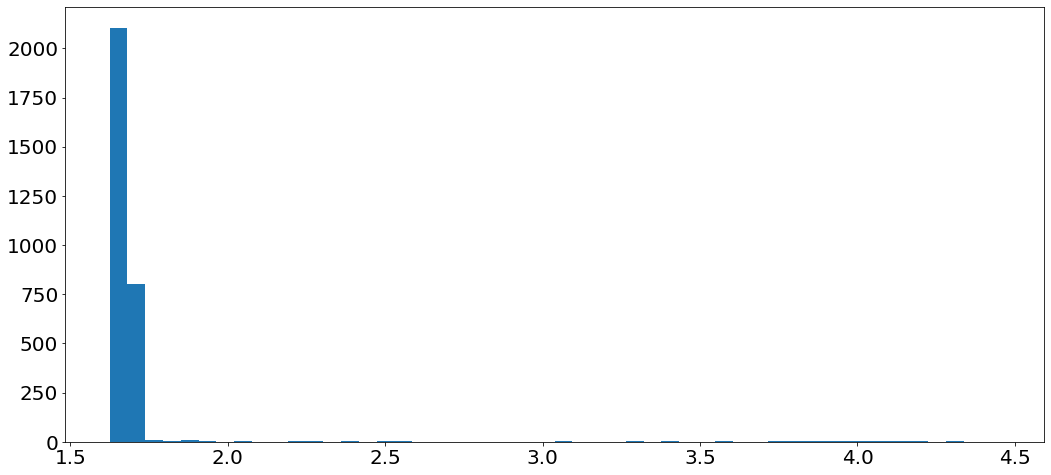

In [303]:
plt.hist(radius_hMff_60_2, bins=50)
plt.show()


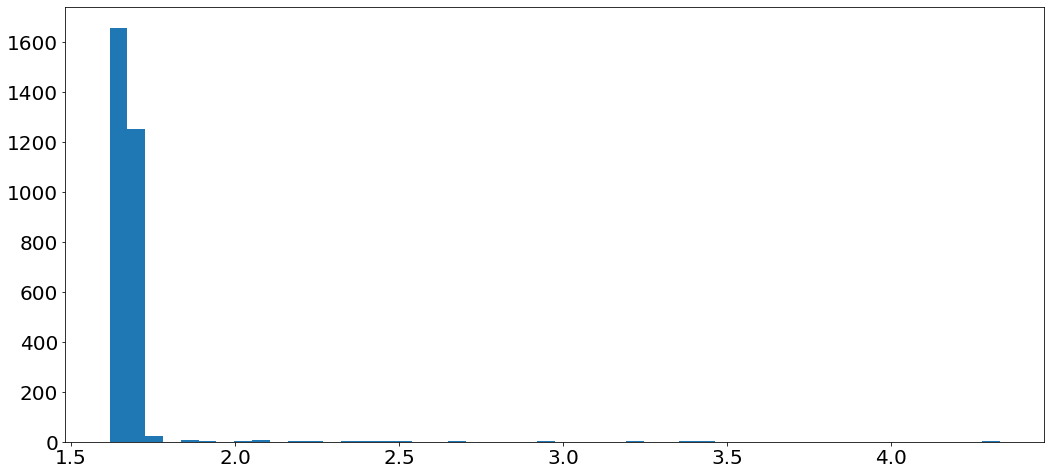

In [335]:
plt.hist(radius_hMff_60_3, bins=50)
plt.show()

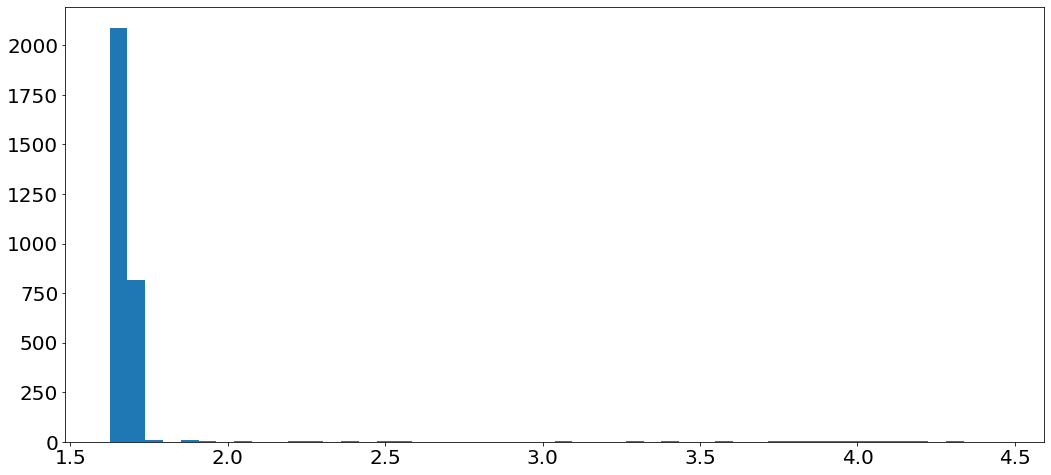

In [344]:
plt.hist(radius_hMff_60_2, bins=50)
plt.show()

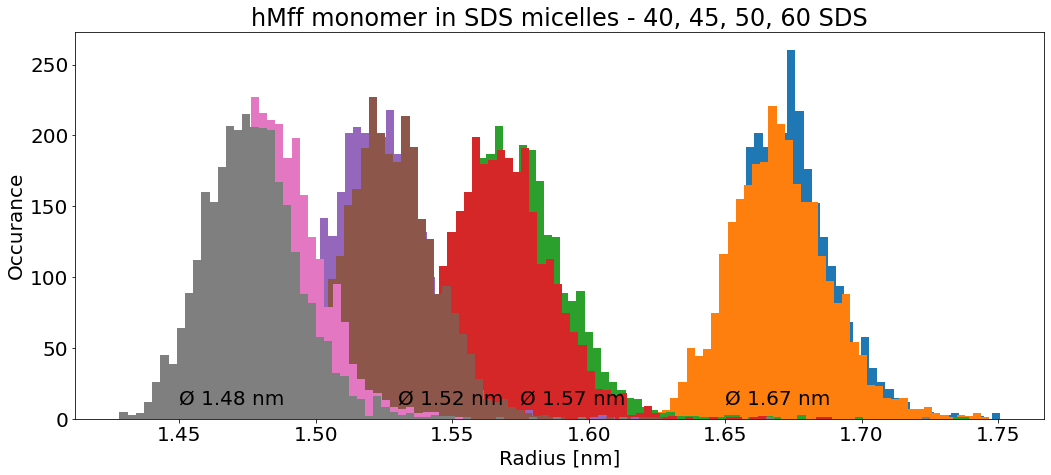

In [395]:
binwidth=0.003
sor=[i for i in radius_hMff_60_2 if i<1.75]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_60_3 if i<1.75]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.65, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")

sor=[i for i in radius_hMff_50_2 if i<1.75]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_50_3 if i<1.7]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.575, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")
sor=[i for i in radius_hMff_45_2 if i<1.65]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_45_3 if i<1.65]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.53, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")
sor=[i for i in radius_hMff_40_2 if i<1.6]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_40_3 if i<1.75]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))
plt.text(1.45, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")

#plt.text(1.7, 200,"$k_b$ T" )
plt.xlabel("Radius [nm]")
plt.ylabel("Occurance")
plt.title("hMff monomer in SDS micelles - 40, 45, 50, 60 SDS")
plt.show()

In [376]:
round(3.43434,2)

3.43

In [401]:
import sys
sys.path.append("/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/")
sys.path.insert(1, '/home/nenciric/Documents/git/charged_molecules_binding/simulations_list/')
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;
import relaxation_times as rt

In [432]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

folder_path="/home/nenciric/Documents/git/CorysPeptides/relaxation_times_micelles_replicas/hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3_0_3000_N_HN/"
output_path="/home/nenciric/Documents/git/CorysPeptides/gyration_radius/"
output_name="hMff_40SDS_2"
#output_name=output_path+output_name
author_name="Ricky Nencini"
yaml_output=output_path+output_name+".yaml"

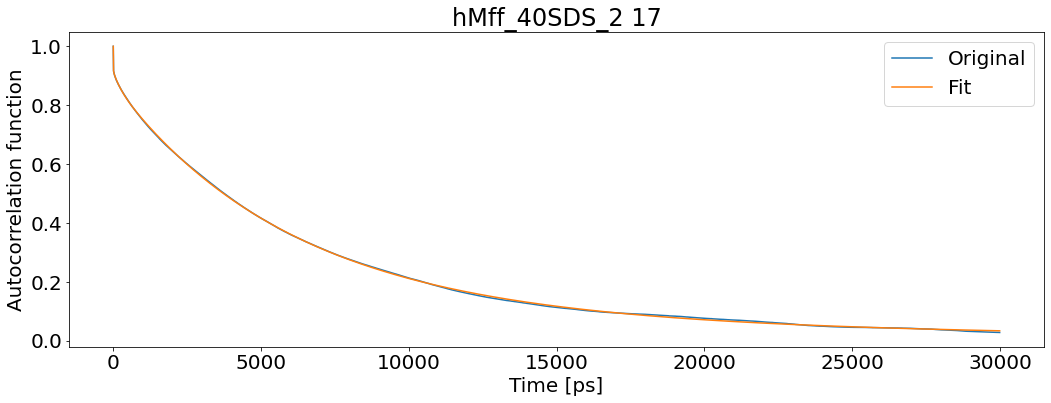

T1: 0.8513034846333043 T2: 0.07654572875605742 NOE: 0.7517774205585289


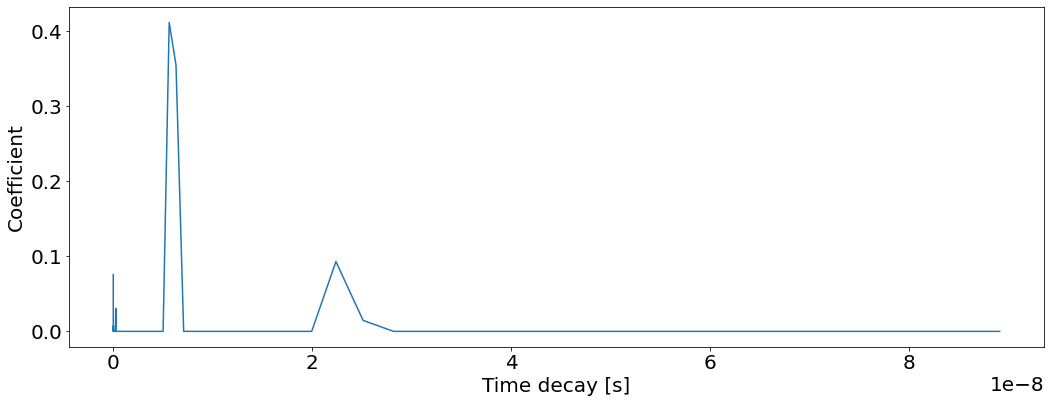

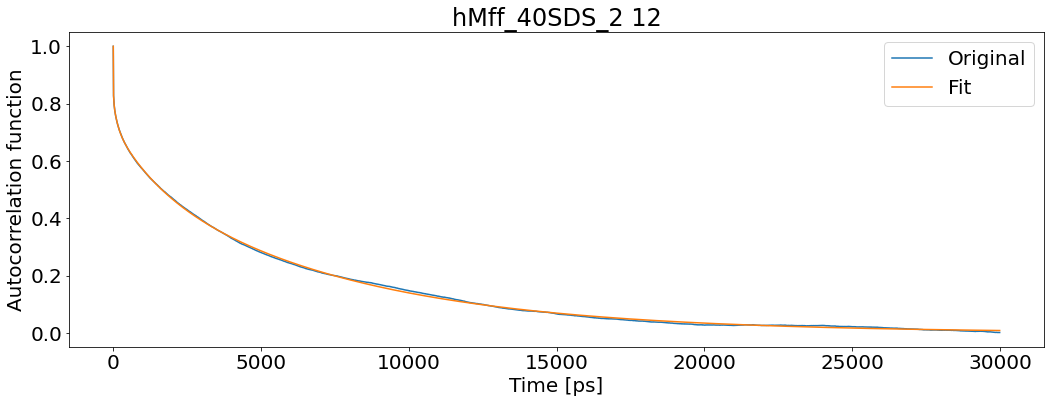

T1: 0.8716544492688271 T2: 0.12195672015593073 NOE: 0.5677074120101726


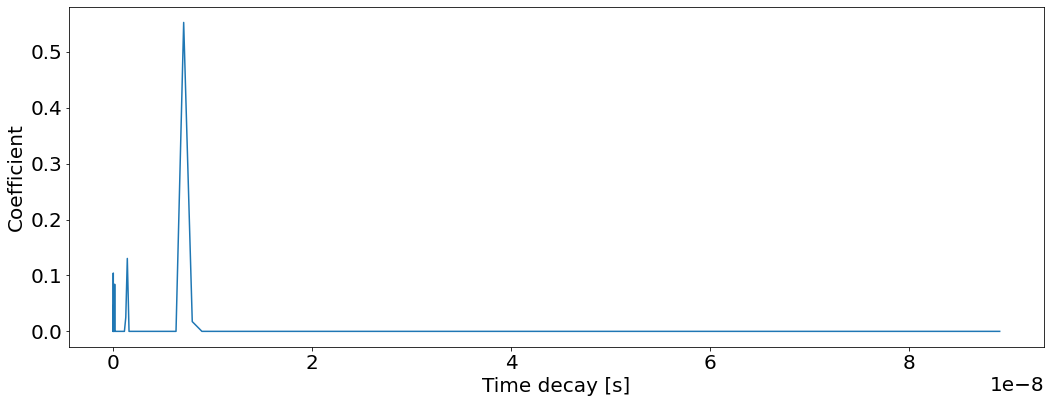

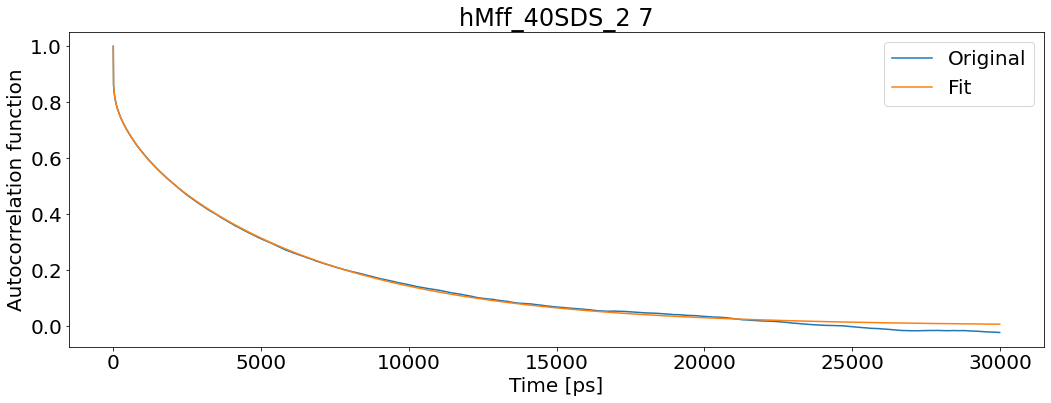

T1: 0.858202636840671 T2: 0.11732405750487293 NOE: 0.6261870276313655


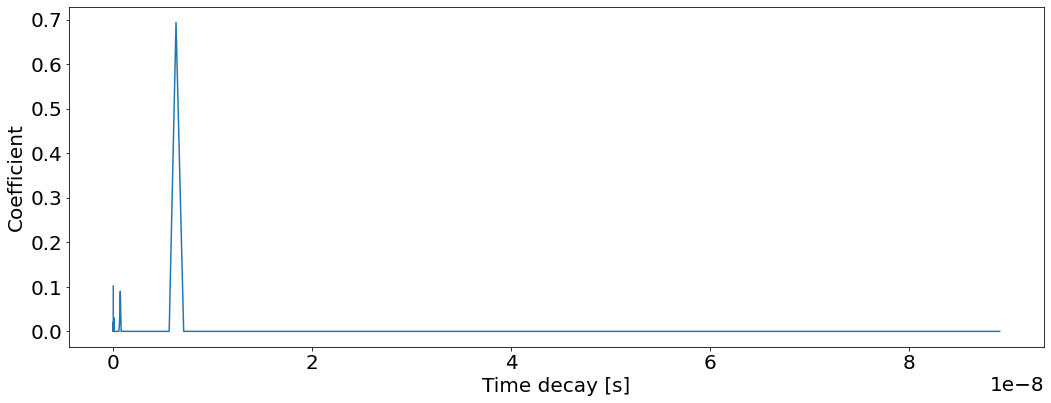

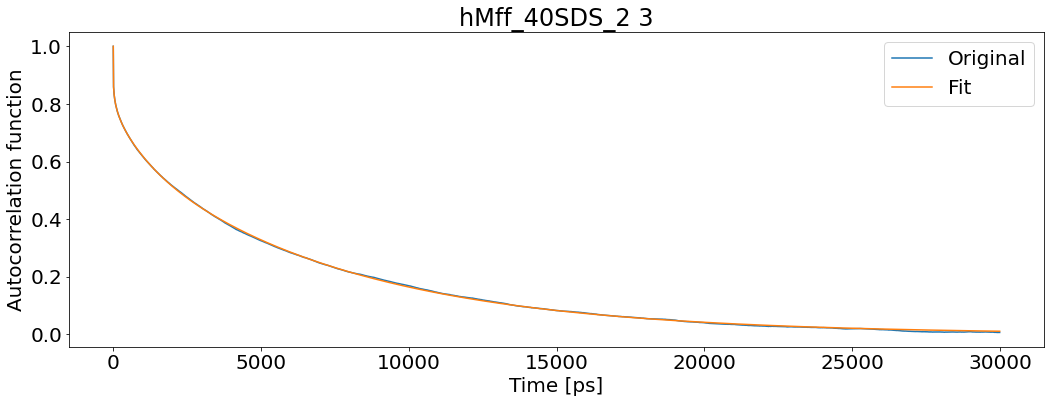

T1: 0.8886351127981174 T2: 0.10811129775079165 NOE: 0.6043359872070458


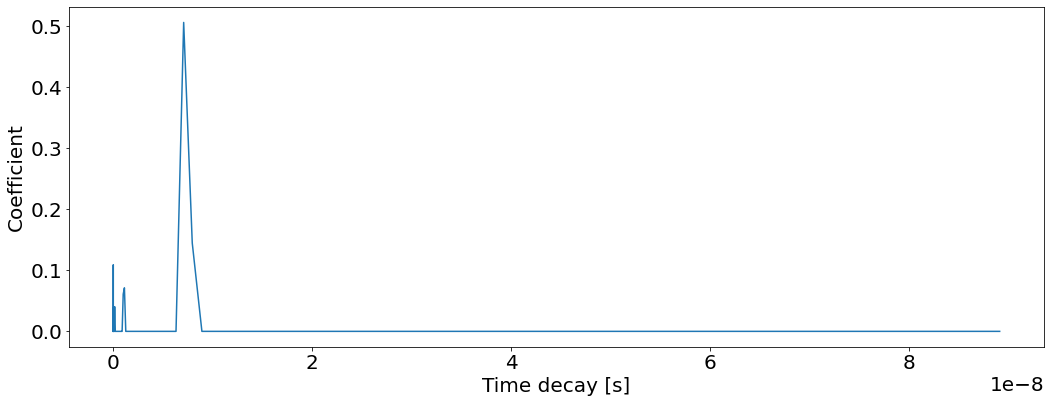

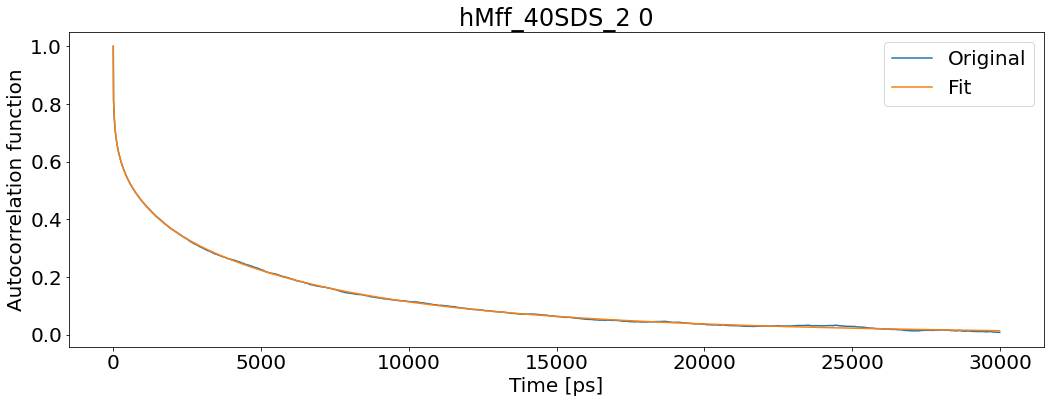

T1: 0.920838331524471 T2: 0.14008119356395898 NOE: 0.34066080263116516


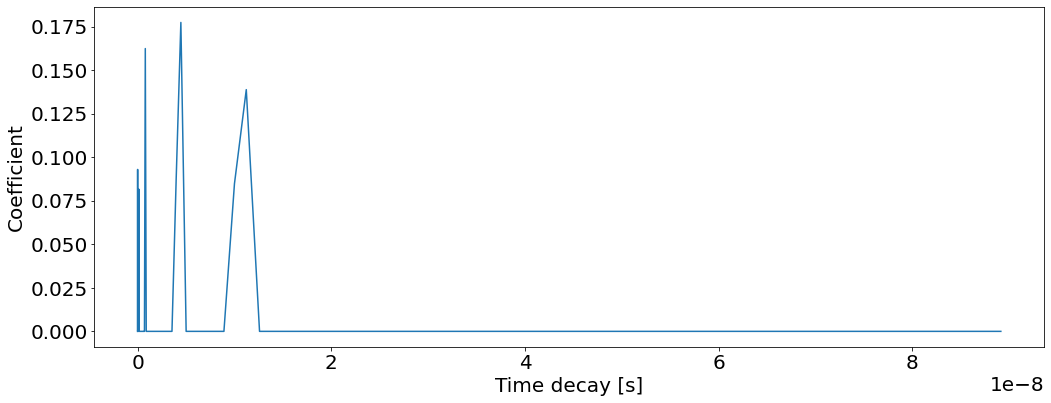

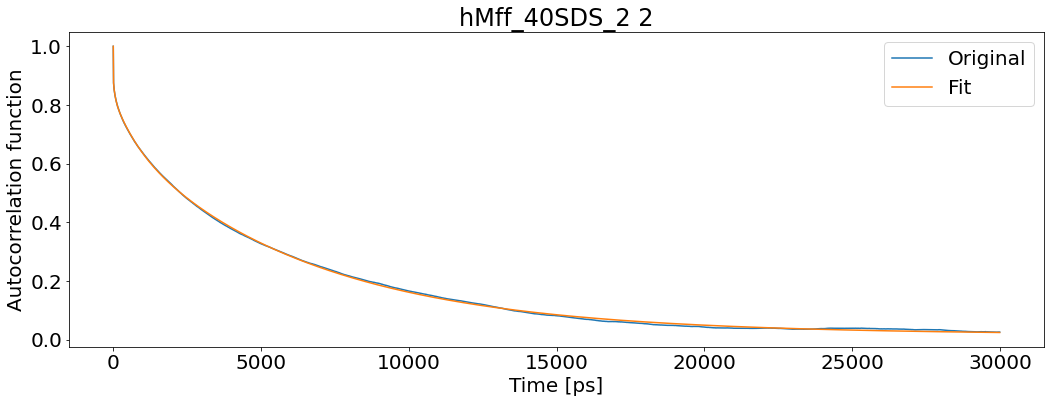

T1: 0.8435828819290286 T2: 0.08087182088267111 NOE: 0.642513259397991


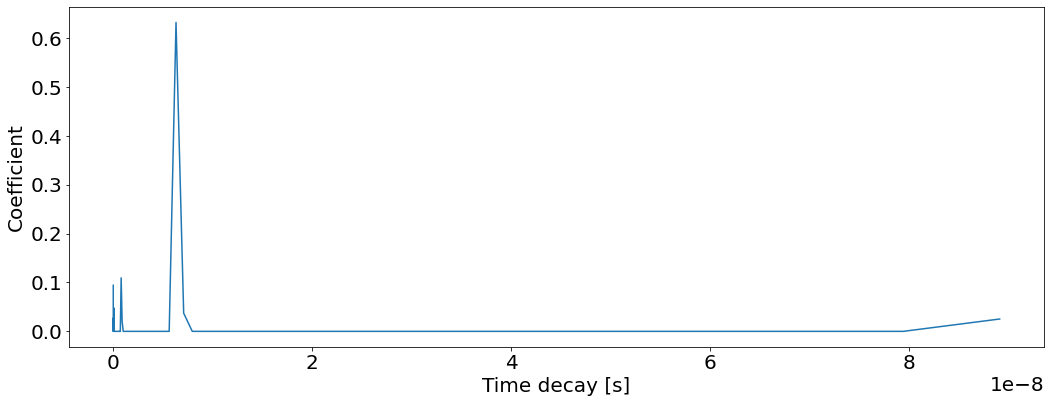

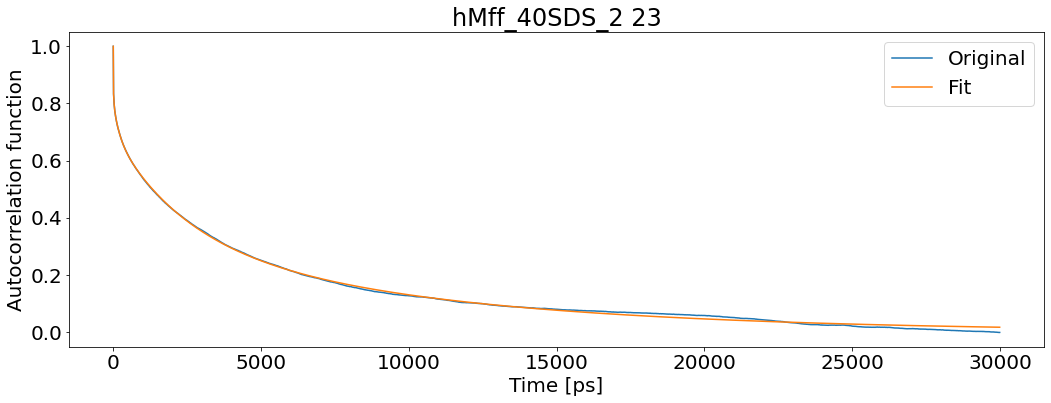

T1: 0.7828682996770239 T2: 0.1214328873143945 NOE: 0.535431883053237


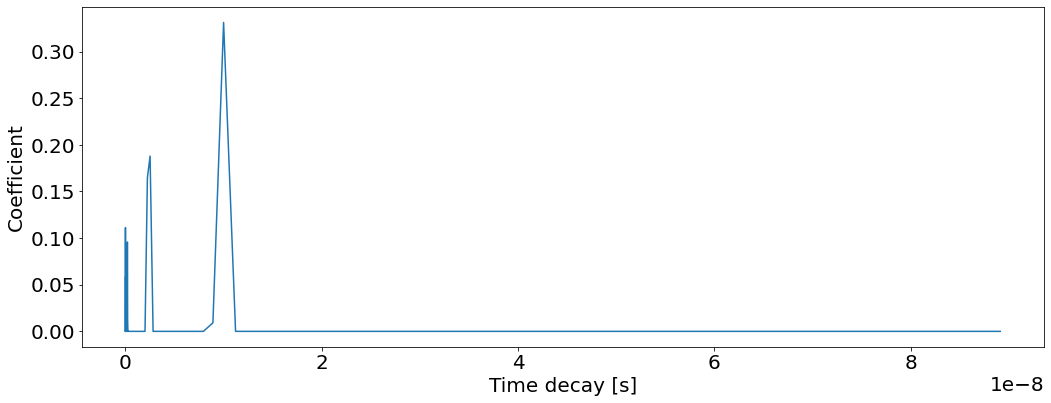

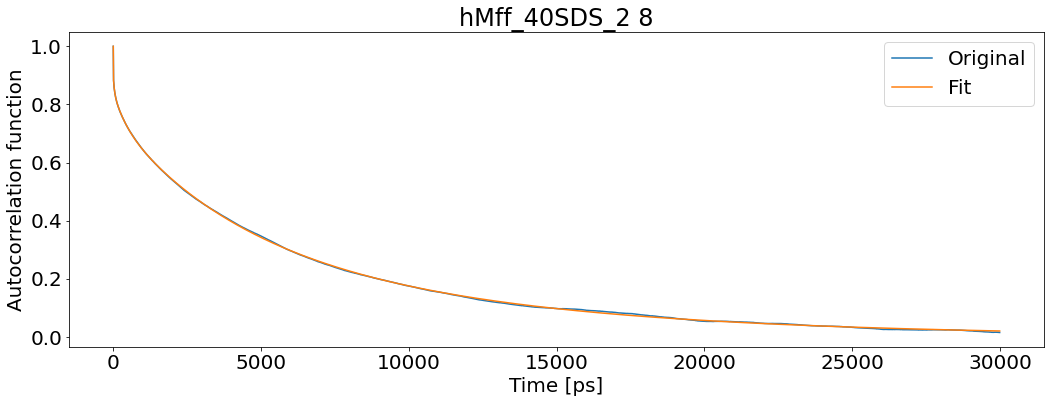

T1: 0.8514646281000094 T2: 0.09743536691005583 NOE: 0.6198573427758315


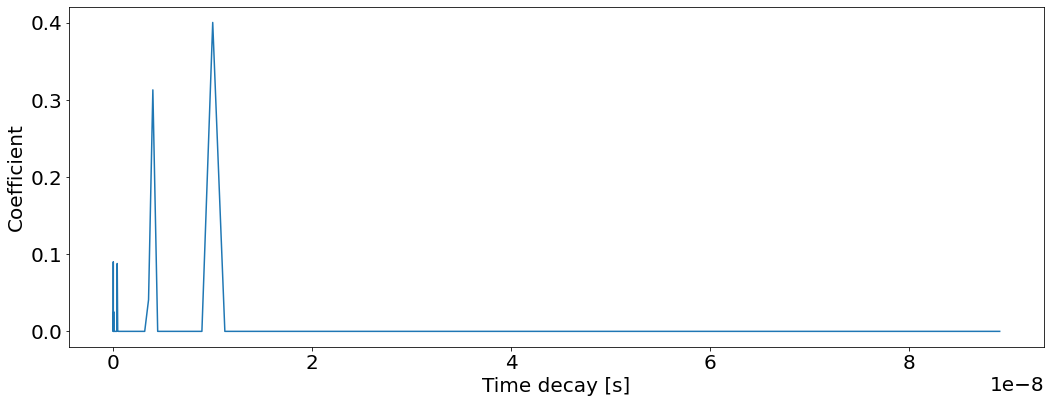

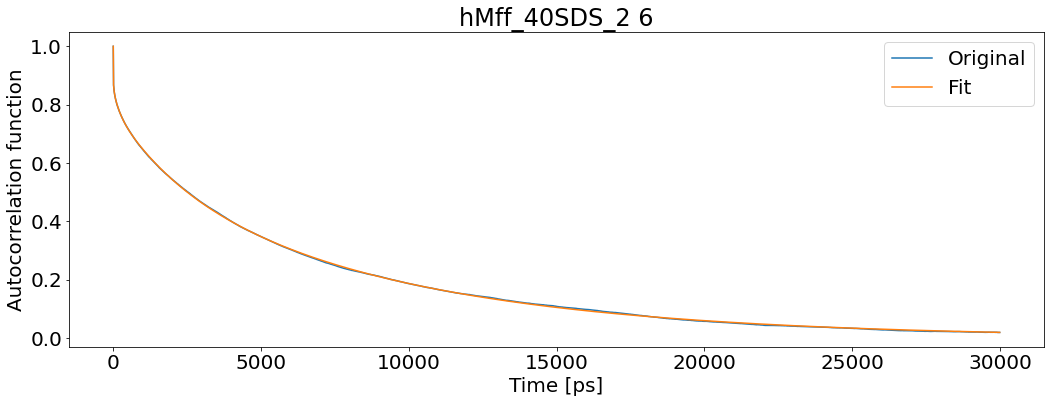

T1: 0.8562513691303402 T2: 0.09580063381641774 NOE: 0.6403245799106074


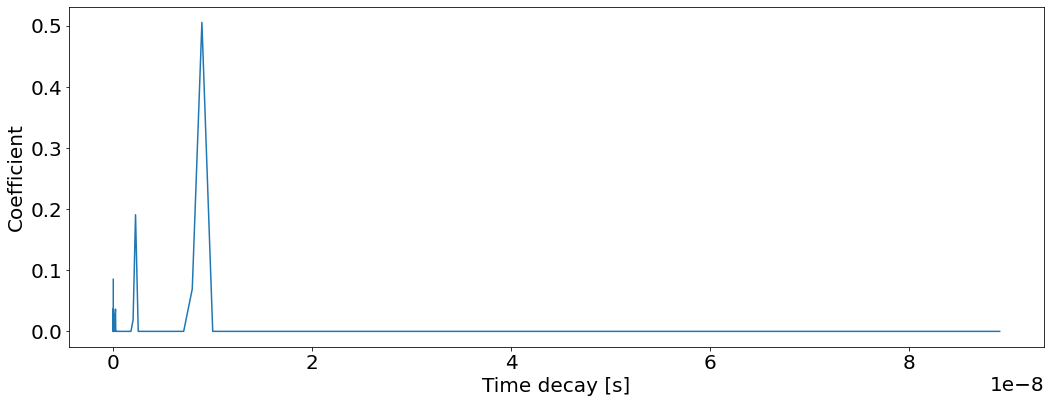

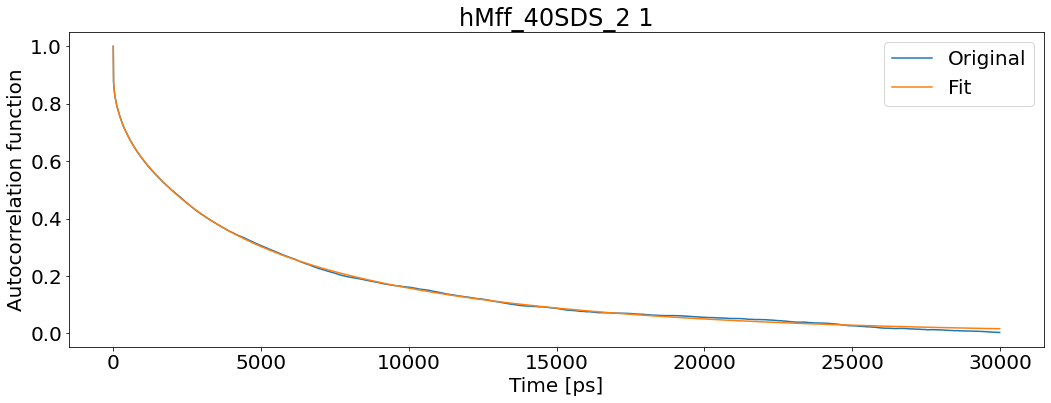

T1: 0.787463155101343 T2: 0.10668104494813217 NOE: 0.5744651413920507


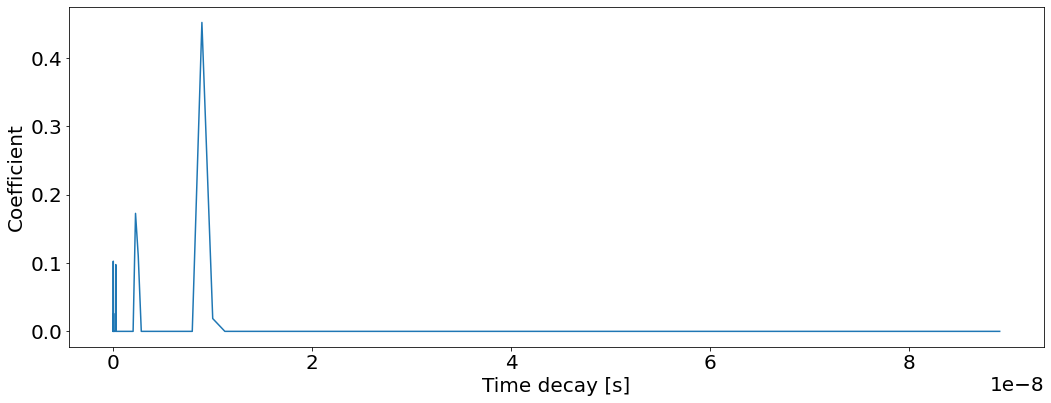

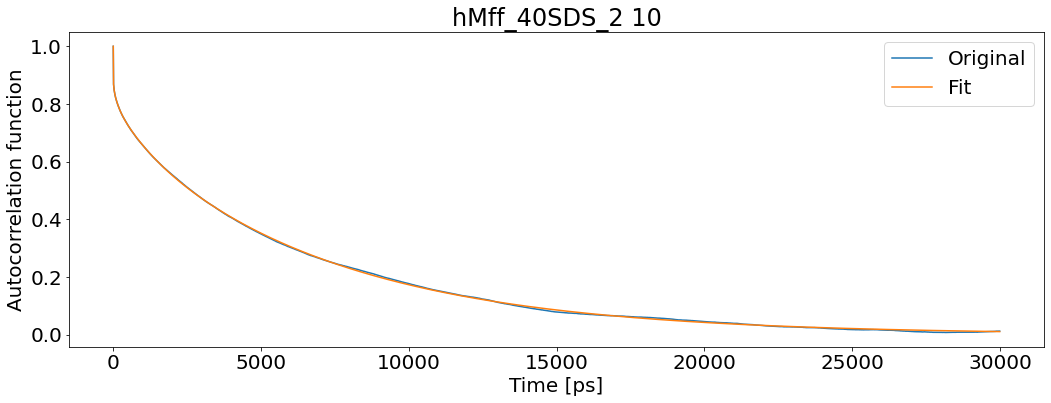

T1: 0.8810811357388889 T2: 0.10287485167666242 NOE: 0.6556092243074214


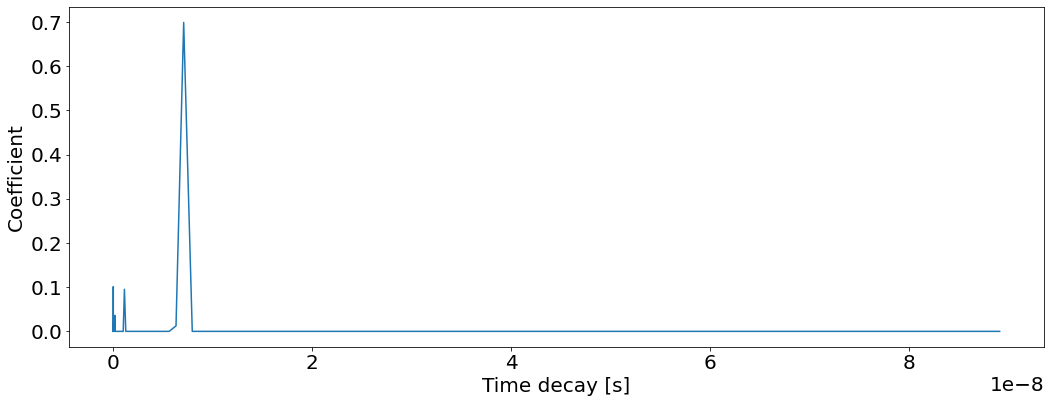

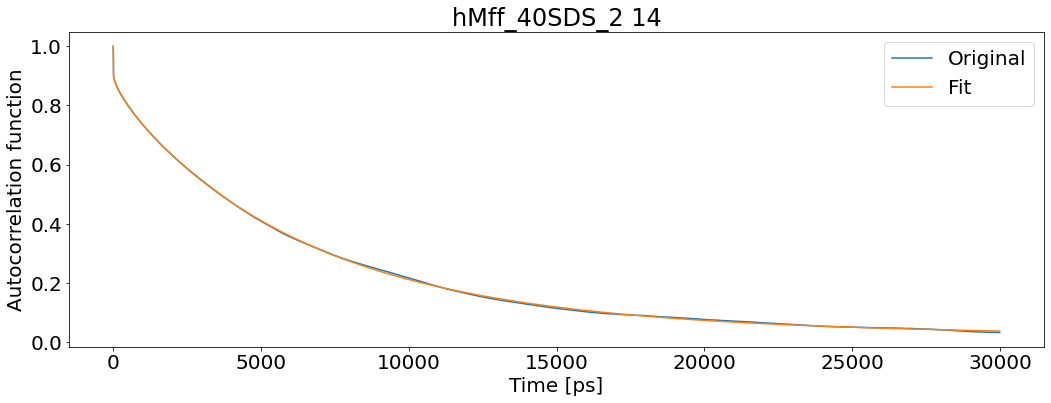

T1: 0.8789779217037021 T2: 0.07318071967911983 NOE: 0.7575086820997271


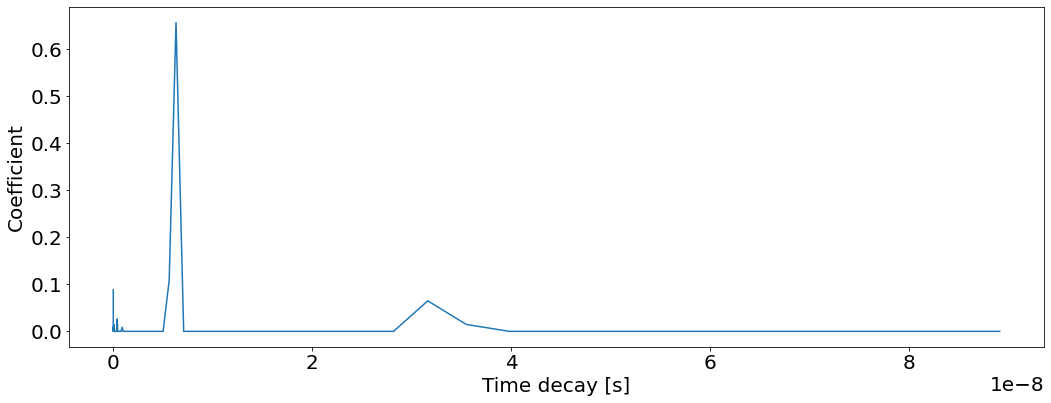

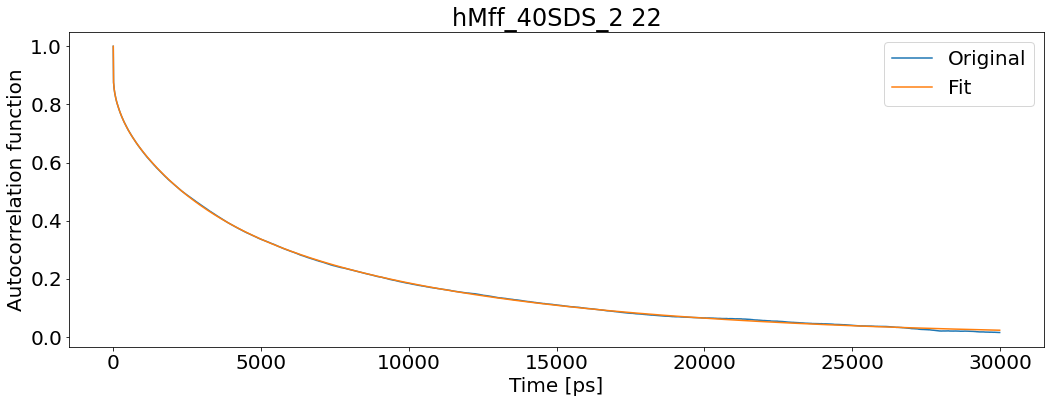

T1: 0.8205550523812051 T2: 0.09469946778269614 NOE: 0.6228404933614398


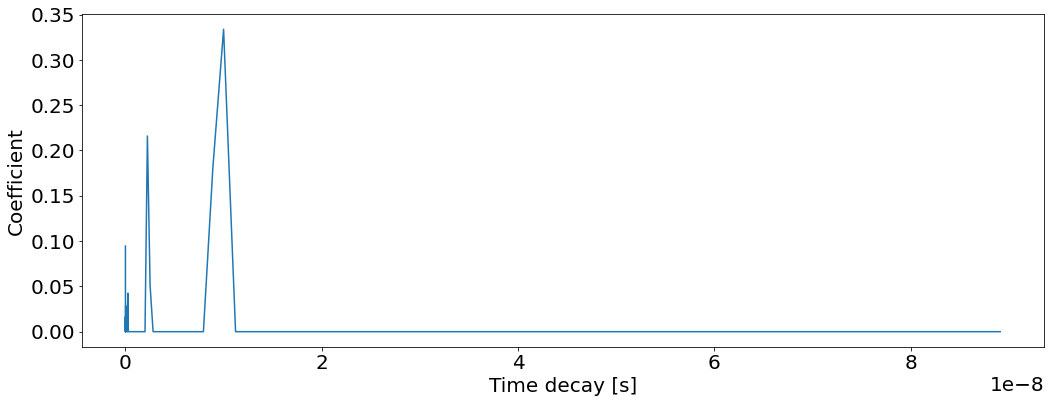

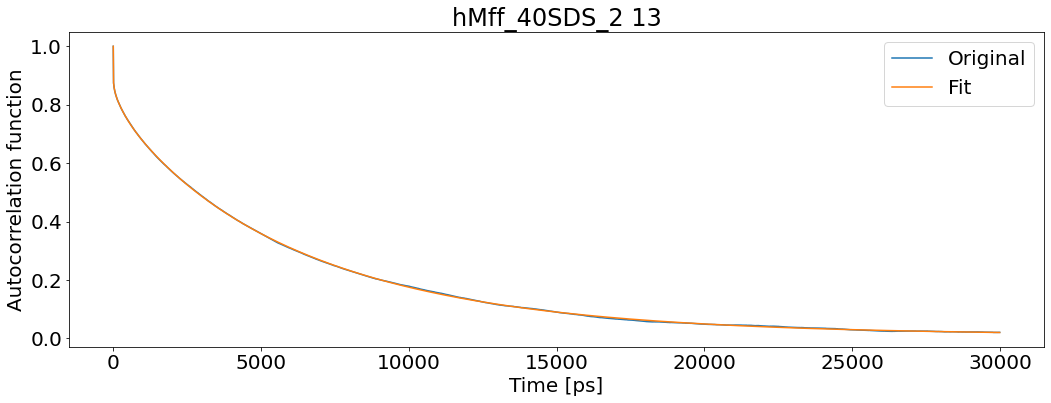

T1: 0.8537303454695149 T2: 0.08282656858793379 NOE: 0.6949638984366943


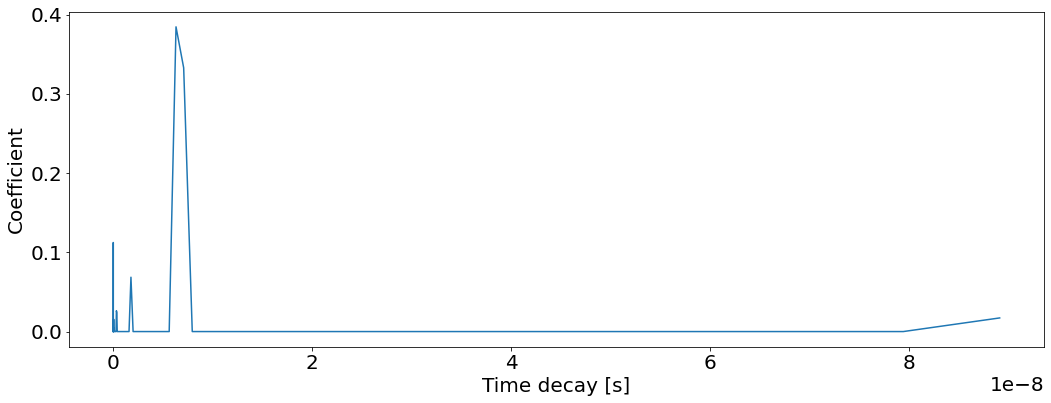

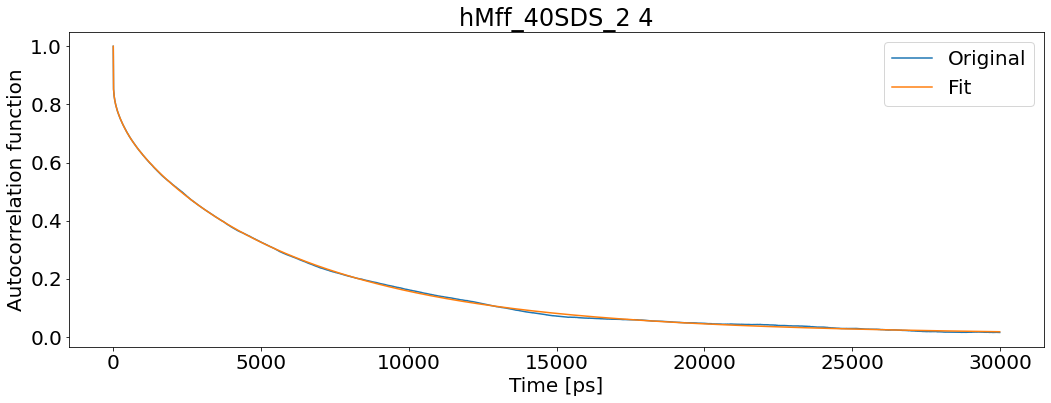

T1: 0.8680212472037817 T2: 0.10298649477741281 NOE: 0.6289148864818216


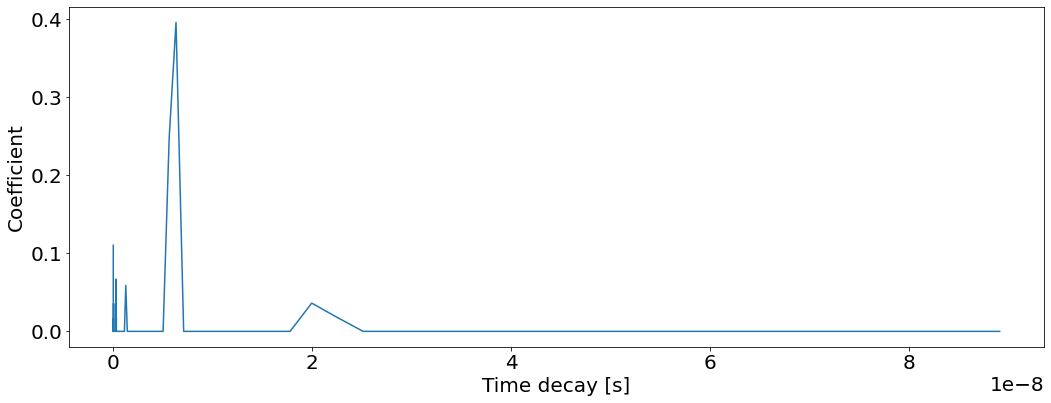

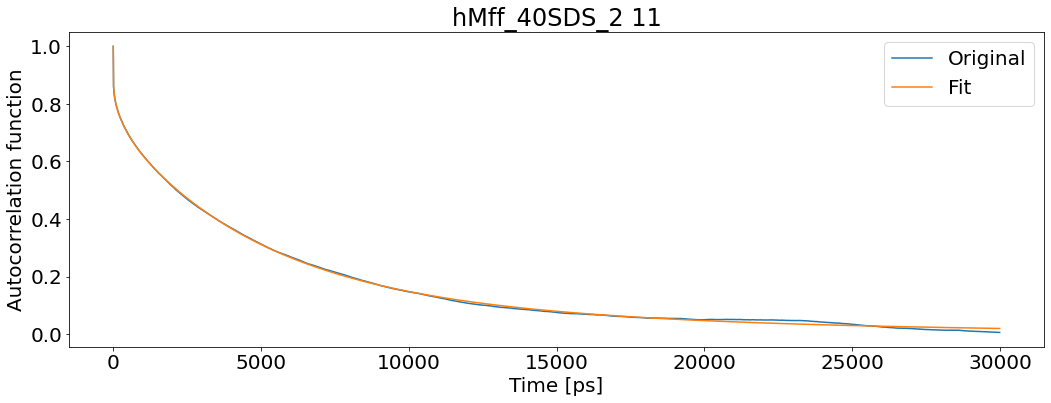

T1: 0.8267342967791395 T2: 0.10477958603207012 NOE: 0.6310205842586959


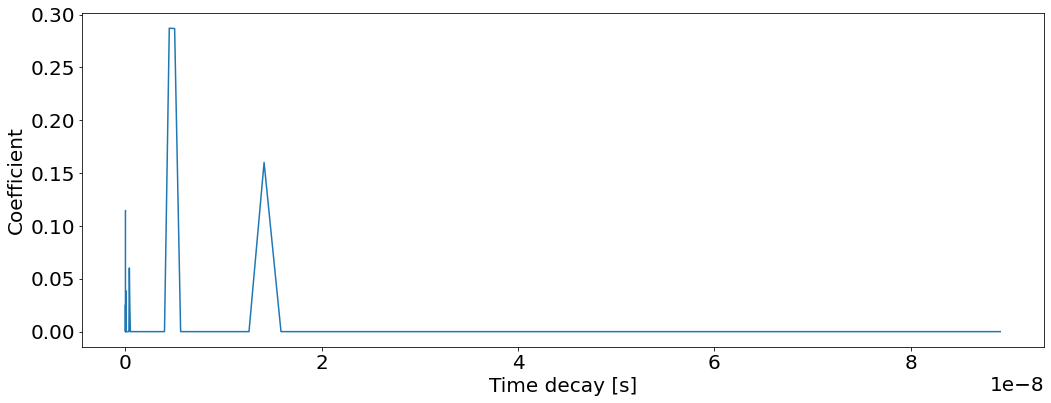

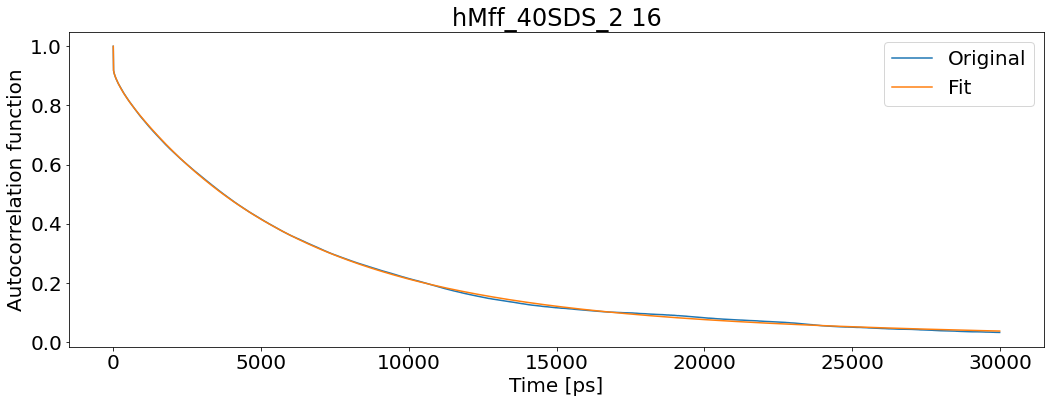

T1: 0.8342020467913617 T2: 0.07583929416337648 NOE: 0.7671164805342074


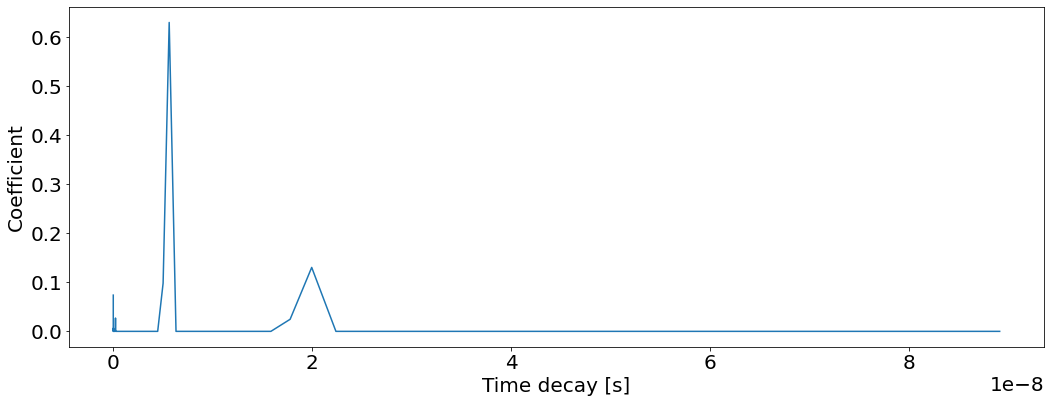

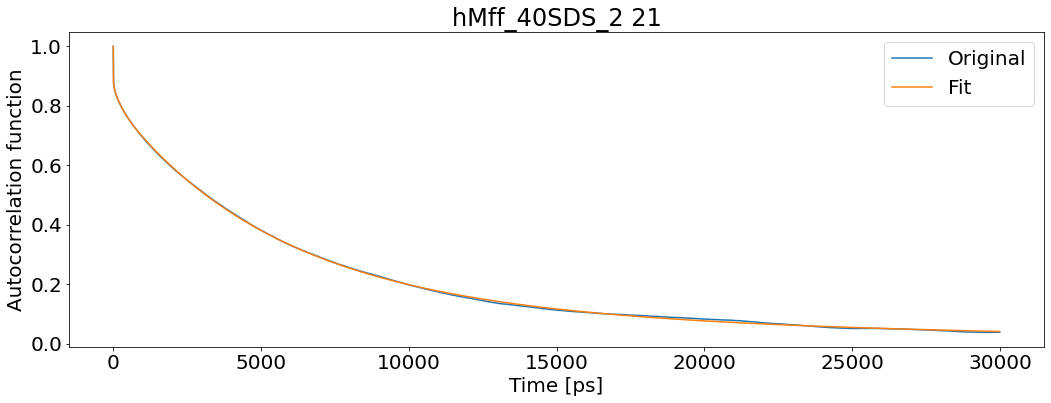

T1: 0.8744815582618672 T2: 0.07821864115095548 NOE: 0.7045539270036213


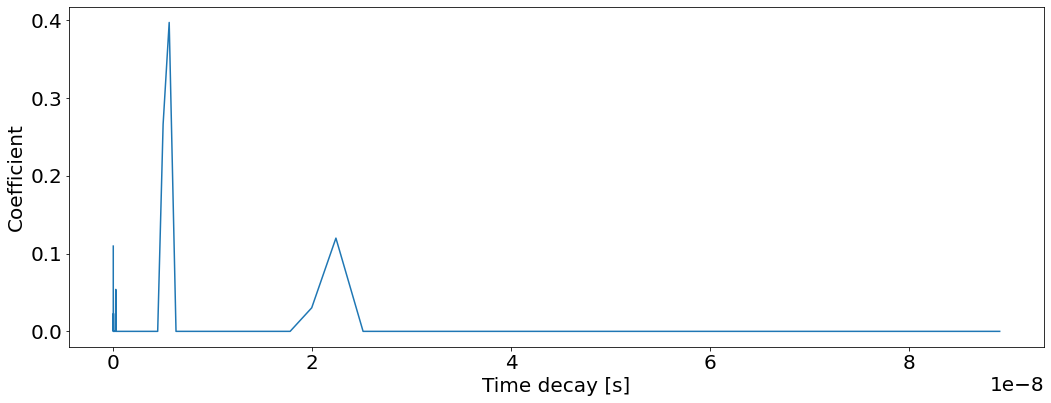

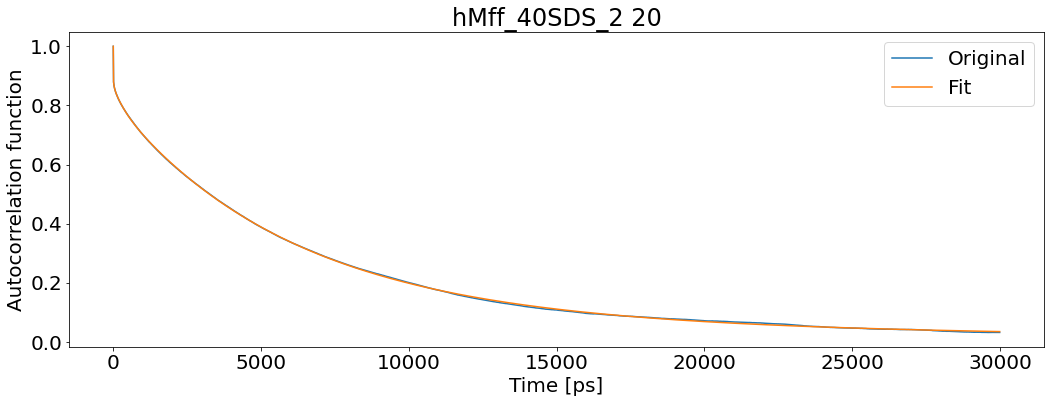

T1: 0.8943962779888257 T2: 0.07872366182305424 NOE: 0.7173033502717461


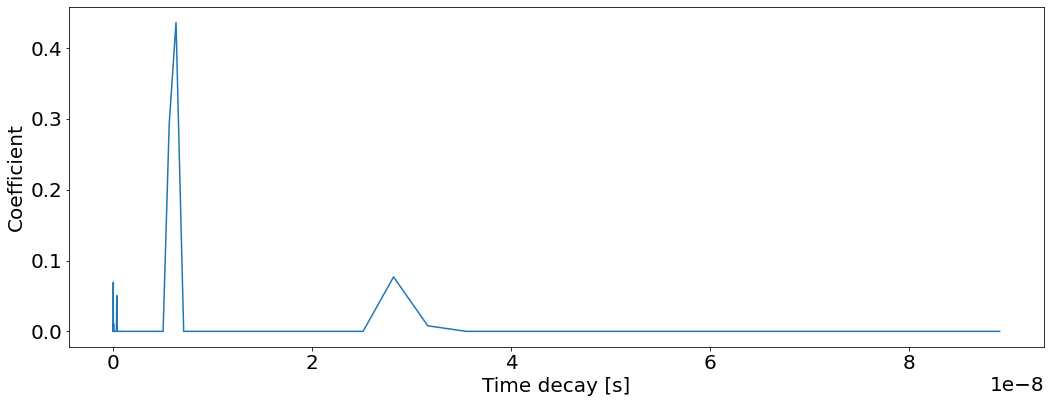

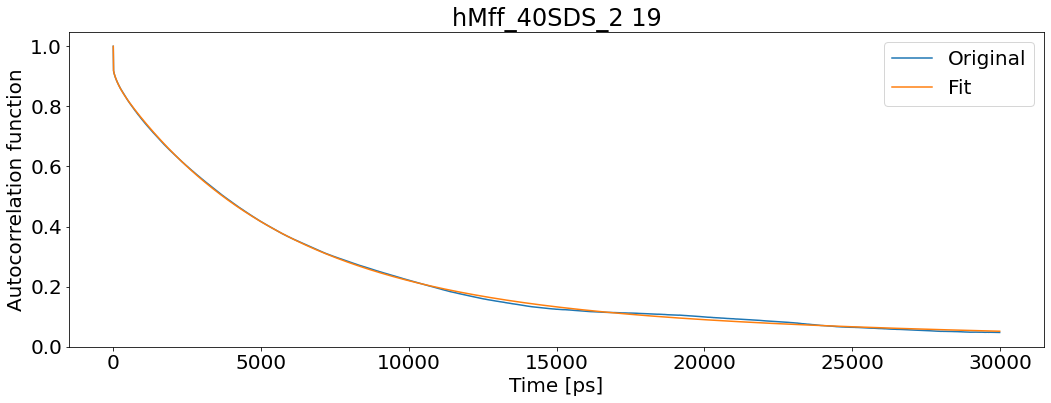

T1: 0.827707967817128 T2: 0.06801708339476878 NOE: 0.7715688509855126


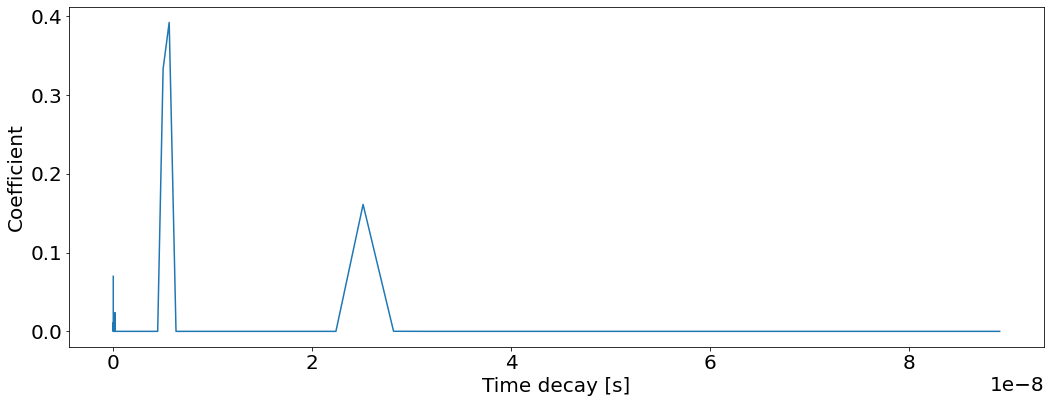

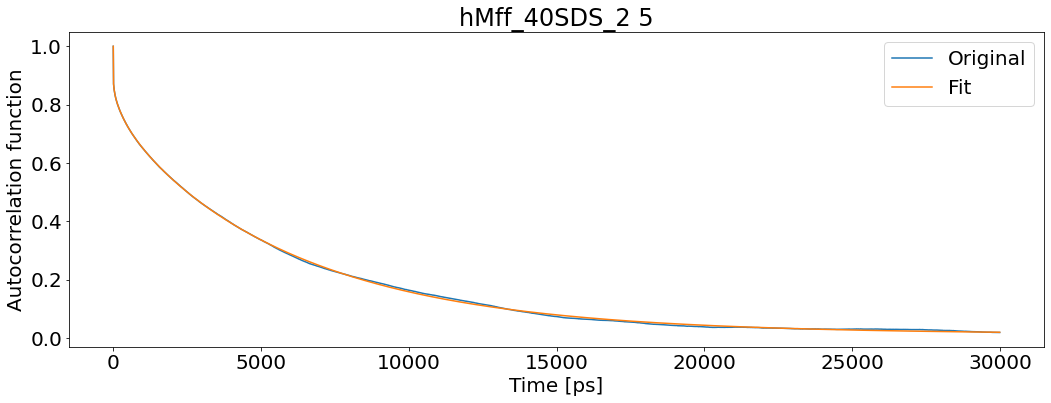

T1: 0.8436412996153457 T2: 0.08522347378441915 NOE: 0.6506293124723334


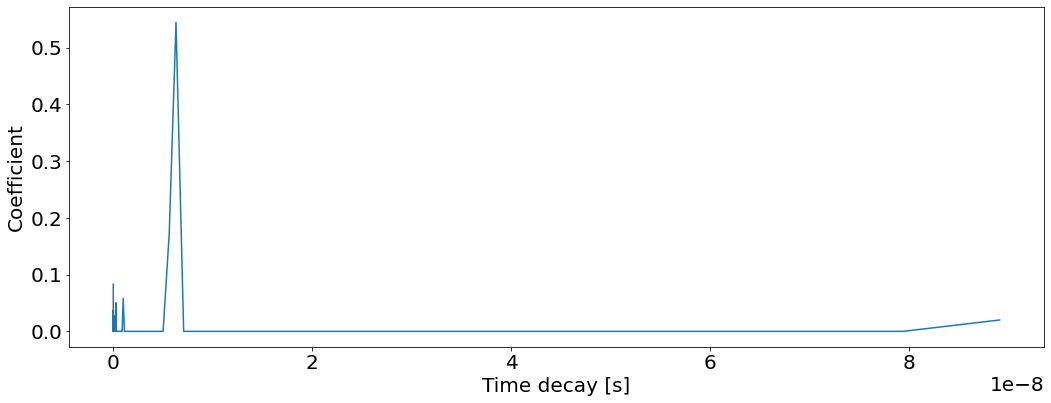

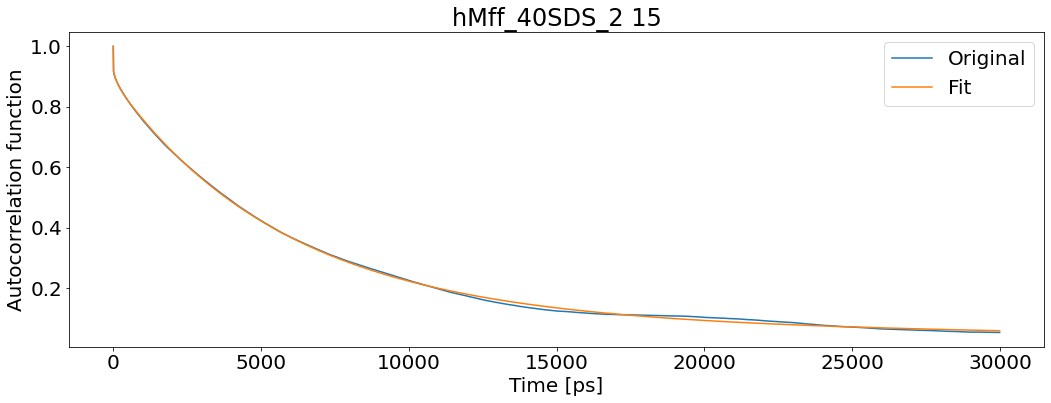

T1: 0.8477027952417464 T2: 0.05890865957548735 NOE: 0.7736912820801873


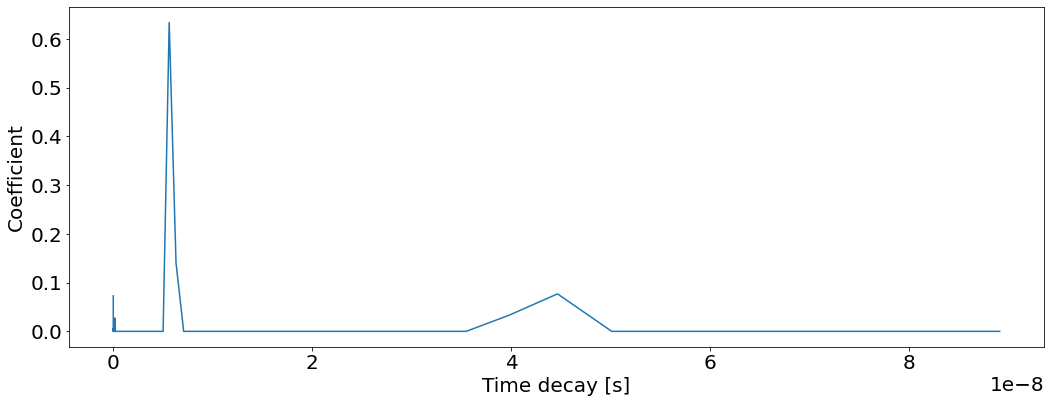

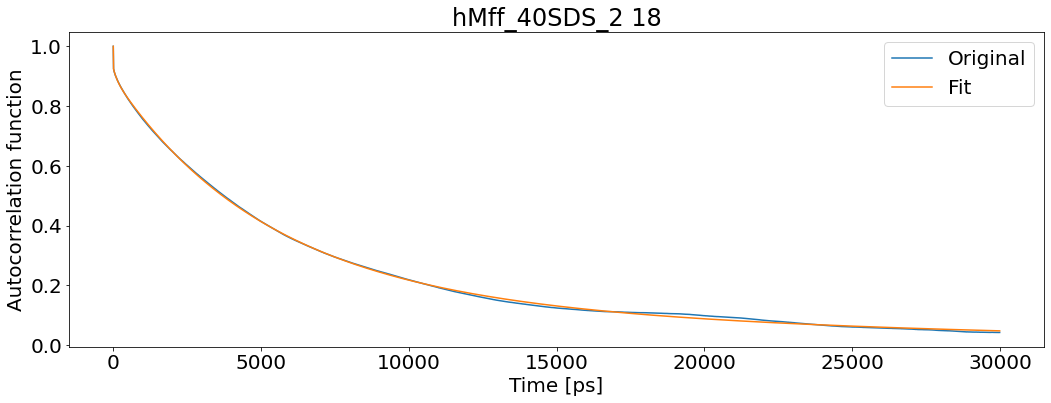

T1: 0.8057000126641883 T2: 0.07101872130252111 NOE: 0.7779159397960657


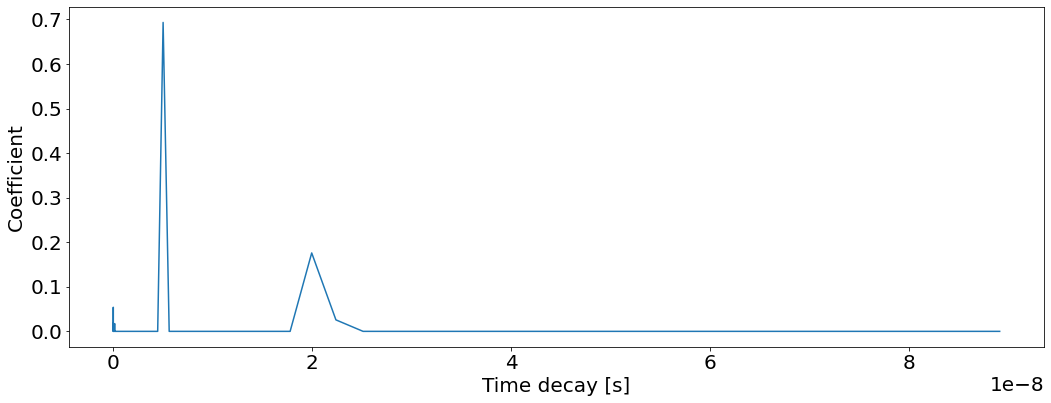

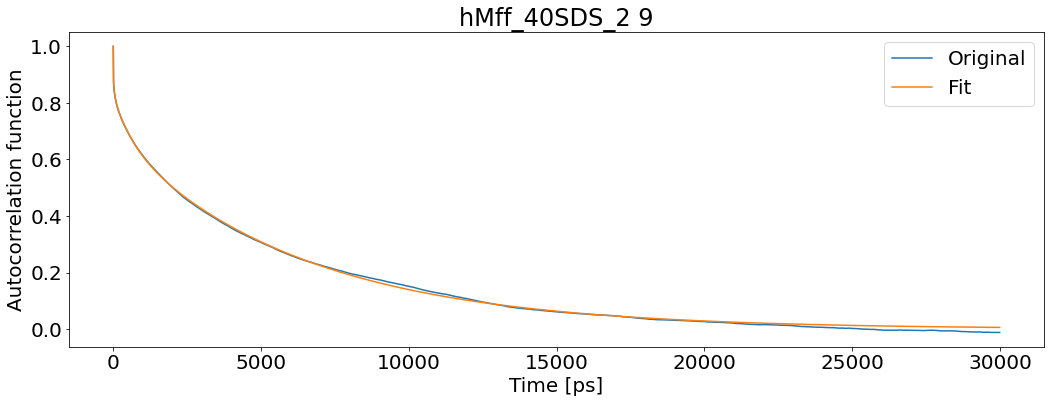

T1: 0.8408179375214003 T2: 0.11874555073466021 NOE: 0.6030346778434107


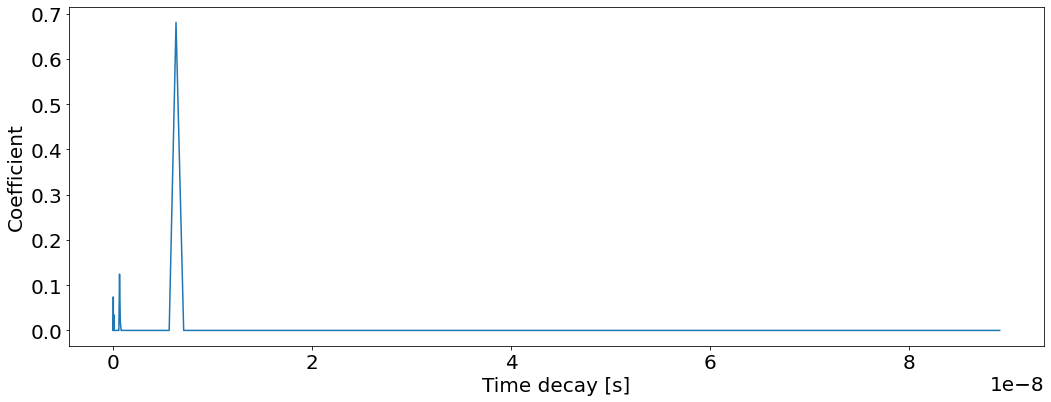

In [433]:
"""Analyze the whole content of a folder"""
hMff60_3_as=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

In [445]:
aikaskaalat=[]
for dicOfAA in [hMff40_2_as,hMff40_3_as,hMff45_2_as,hMff45_3_as,hMff50_2_as,hMff50_3_as,hMff60_2_as,hMff60_3_as]:
    avr=0
    for key in dicOfAA:
        avr+=dicOfAA[key].Ctimes[np.argmax(dicOfAA[key].Coeffs)]/len(dicOfAA)
    print("biggest timescale: ",avr)
    aikaskaalat.append(1/((avr*10**9)**3))

biggest timescale:  5.388878564402782e-09
biggest timescale:  5.027159050683326e-09
biggest timescale:  6.202883706845213e-09
biggest timescale:  5.7362291840575945e-09
biggest timescale:  6.22207091199924e-09
biggest timescale:  6.363008675389704e-09
biggest timescale:  7.56509807729159e-09
biggest timescale:  6.733441262142669e-09


In [443]:
radius=[]
sor=[i for i in radius_hMff_40_2 if i<1.6]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_40_3 if i<1.6]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_45_2 if i<1.65]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_45_3 if i<1.65]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_50_2 if i<1.7]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_50_3 if i<1.7]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_60_2 if i<1.75]
radius.append(1/np.mean(sor))
print(np.mean(sor))

sor=[i for i in radius_hMff_60_3 if i<1.75]
radius.append(1/np.mean(sor))
print(np.mean(sor))



1.4845198622140952
1.4765981699130537
1.5232161683473056
1.5258541258055902
1.5724526156351508
1.5673688065587699
1.6732631339155832
1.670260438163211


Text(0.5, 1.0, 'Average of the most abundand timescale over AA vs micelle radius')

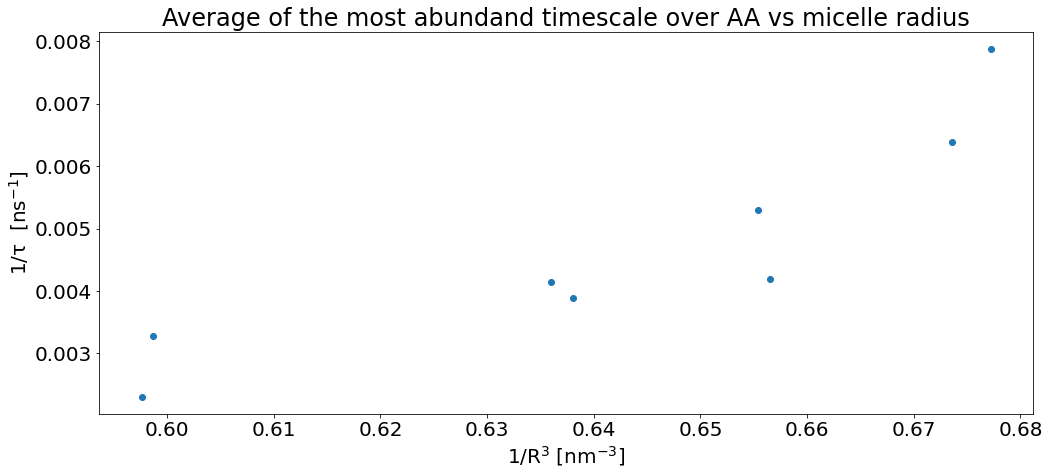

In [457]:
plt.plot(radius,aikaskaalat,"o")
plt.xlabel("1/R$^3$ [nm$^{-3}$]")
plt.ylabel("1/τ  [ns$^{-1}$]")
plt.title("Average of the most abundand timescale over AA vs micelle radius")